In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif ,f_regression
from sklearn.feature_selection import SelectKBest ,SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

from sklearn.feature_selection import RFE

ModuleNotFoundError: No module named 'xgboost'

# **Objective**
#### The main objective of my project is to develop a predictive model that can estimate an individual's risk of developing CVDs<br> based on their personal lifestyle factors. By analyzing a wide range of variables such as diet, physical activity, smoking habits,<br> and more, we aimed to identify key factors that significantly influence CVDs risk

# **Data Info**
#### BRFSS Dataset The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system <br>of health-related telephone surveys that collect state data about U.S. residents regarding their health-related<br> risk behaviors, chronic health conditions, and use of preventive services.


## <font color='blue'> 1. Importing Dataset. </font>


In [2]:
data=pd.read_csv('data/CVD_cleaned.csv')
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


 ## <font color='blue'> 1.Dataset Analysis(part-1) </font>

### Lets first keep safe our original data 

In [30]:
df=data.copy()
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [32]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [33]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [34]:
# categorical Variable 
cat_col=df.columns[df.dtypes=='object']

print('Categorical Columns :',len(cat_col),'\n',cat_col)
      

Categorical Columns : 12 
 Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')


In [35]:

# Check for duplicates based on all columns
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the duplicate rows
duplicate_rows = df[duplicates]
duplicate_rows

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
46402,Good,Within the past year,Yes,No,No,No,Yes,No,No,Female,18-24,163.0,81.65,30.90,No,0.0,60.0,4.0,4.0
49287,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,160.0,72.57,28.34,Yes,0.0,60.0,30.0,4.0
75448,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,163.0,61.23,23.17,Yes,0.0,30.0,16.0,0.0
76857,Excellent,Within the past year,Yes,No,No,No,No,No,No,Male,40-44,173.0,81.65,27.37,No,0.0,30.0,8.0,1.0
78871,Good,Within the past year,Yes,No,No,No,No,No,No,Female,75-79,163.0,58.97,22.31,No,0.0,60.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301474,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,70-74,173.0,77.11,25.85,No,0.0,30.0,30.0,0.0
303040,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,55-59,168.0,74.84,26.63,No,0.0,30.0,30.0,4.0
303600,Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,157.0,72.57,29.26,No,0.0,4.0,12.0,4.0
303609,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,160.0,58.97,23.03,No,0.0,30.0,4.0,4.0


In [36]:
df=df.drop_duplicates()
df.reset_index(inplace=True)
df

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308770,308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308771,308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308772,308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


## Result of Data Analysis:
* The Dataset contains 19 variables. 12 are numerical and 7 are categorical variables
* Dataset has Zero Null Values
* Dataset contain 304445 rows 
* Dataset contain 80 duplicate rows (that has been removed)

# <font color='blue'> 2. Data Analysis(part-2) and **Visualization**. </font>
#### Verifying the correlation between our variables.
- Looking at the correlation of our variables, we can see that we have many correlated variables, but as we have little data in our database, we will keep them for now.

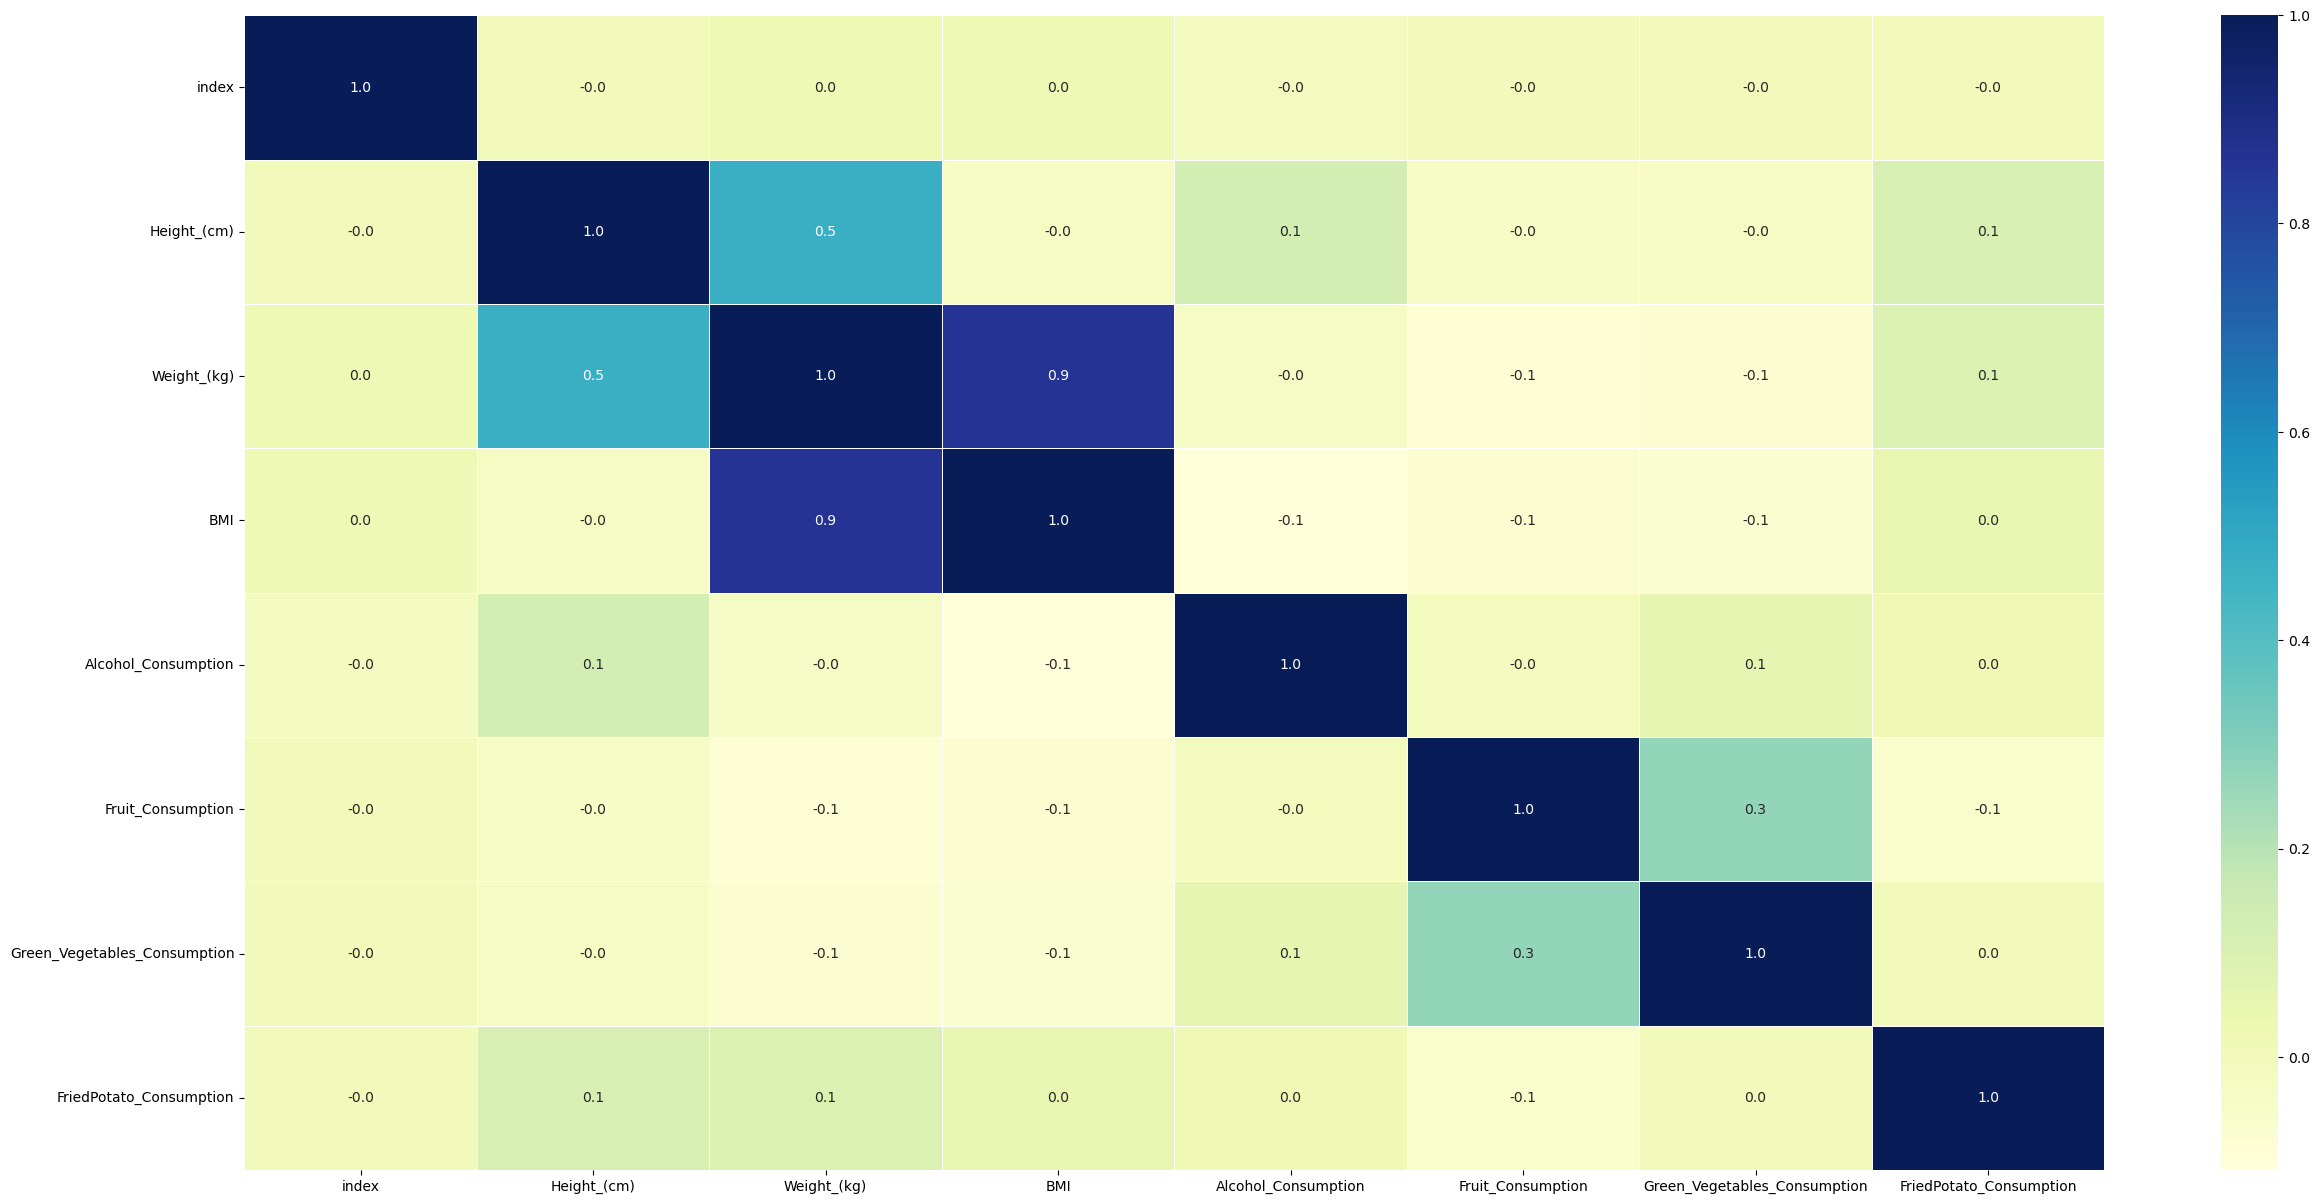

In [37]:
# Correlation matrix
corr = df.corr()
#print(corr)
# Heatmap
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.heatmap(corr,annot=True, linewidths=.5, fmt='.1f', cmap='YlGnBu')

* **Weight_(cm) and BMI columns are 89 % Correlated**

## **Univariate Analysis**

### Lets Analyze Categorical Variable

In [11]:
categorical_variable=df.columns[df.dtypes=='object']
categorical_variable

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')

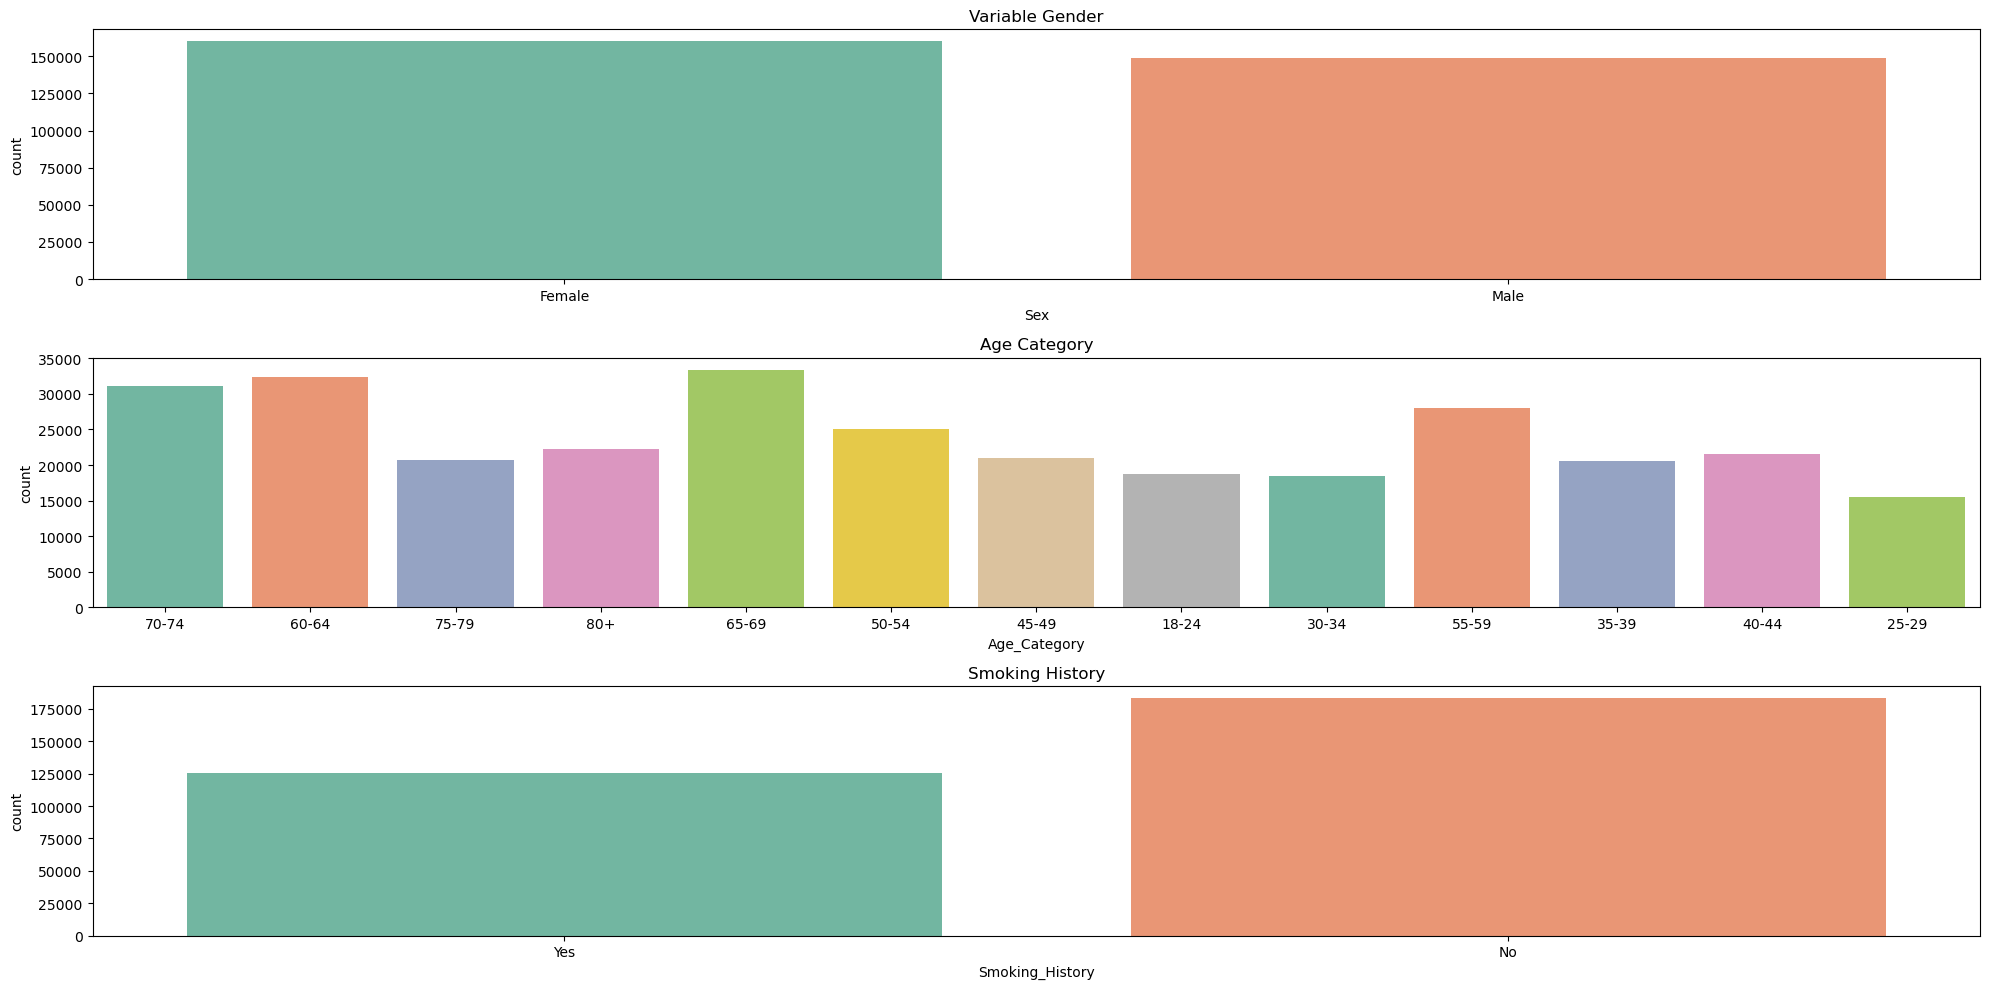

In [147]:
plt.figure(figsize = (20, 10))

plt.subplot(3, 1, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Sex', palette = 'Set2', data = df)

plt.subplot(3, 1, 2)
plt.gca().set_title('Age Category')
sns.countplot(x = 'Age_Category', palette = 'Set2', data = df)

plt.subplot(3, 1, 3)
plt.gca().set_title('Smoking History')
sns.countplot(x = 'Smoking_History', palette = 'Set2', data = df)
plt.tight_layout()
plt.show()

### **Lets Visualize Other Disease**

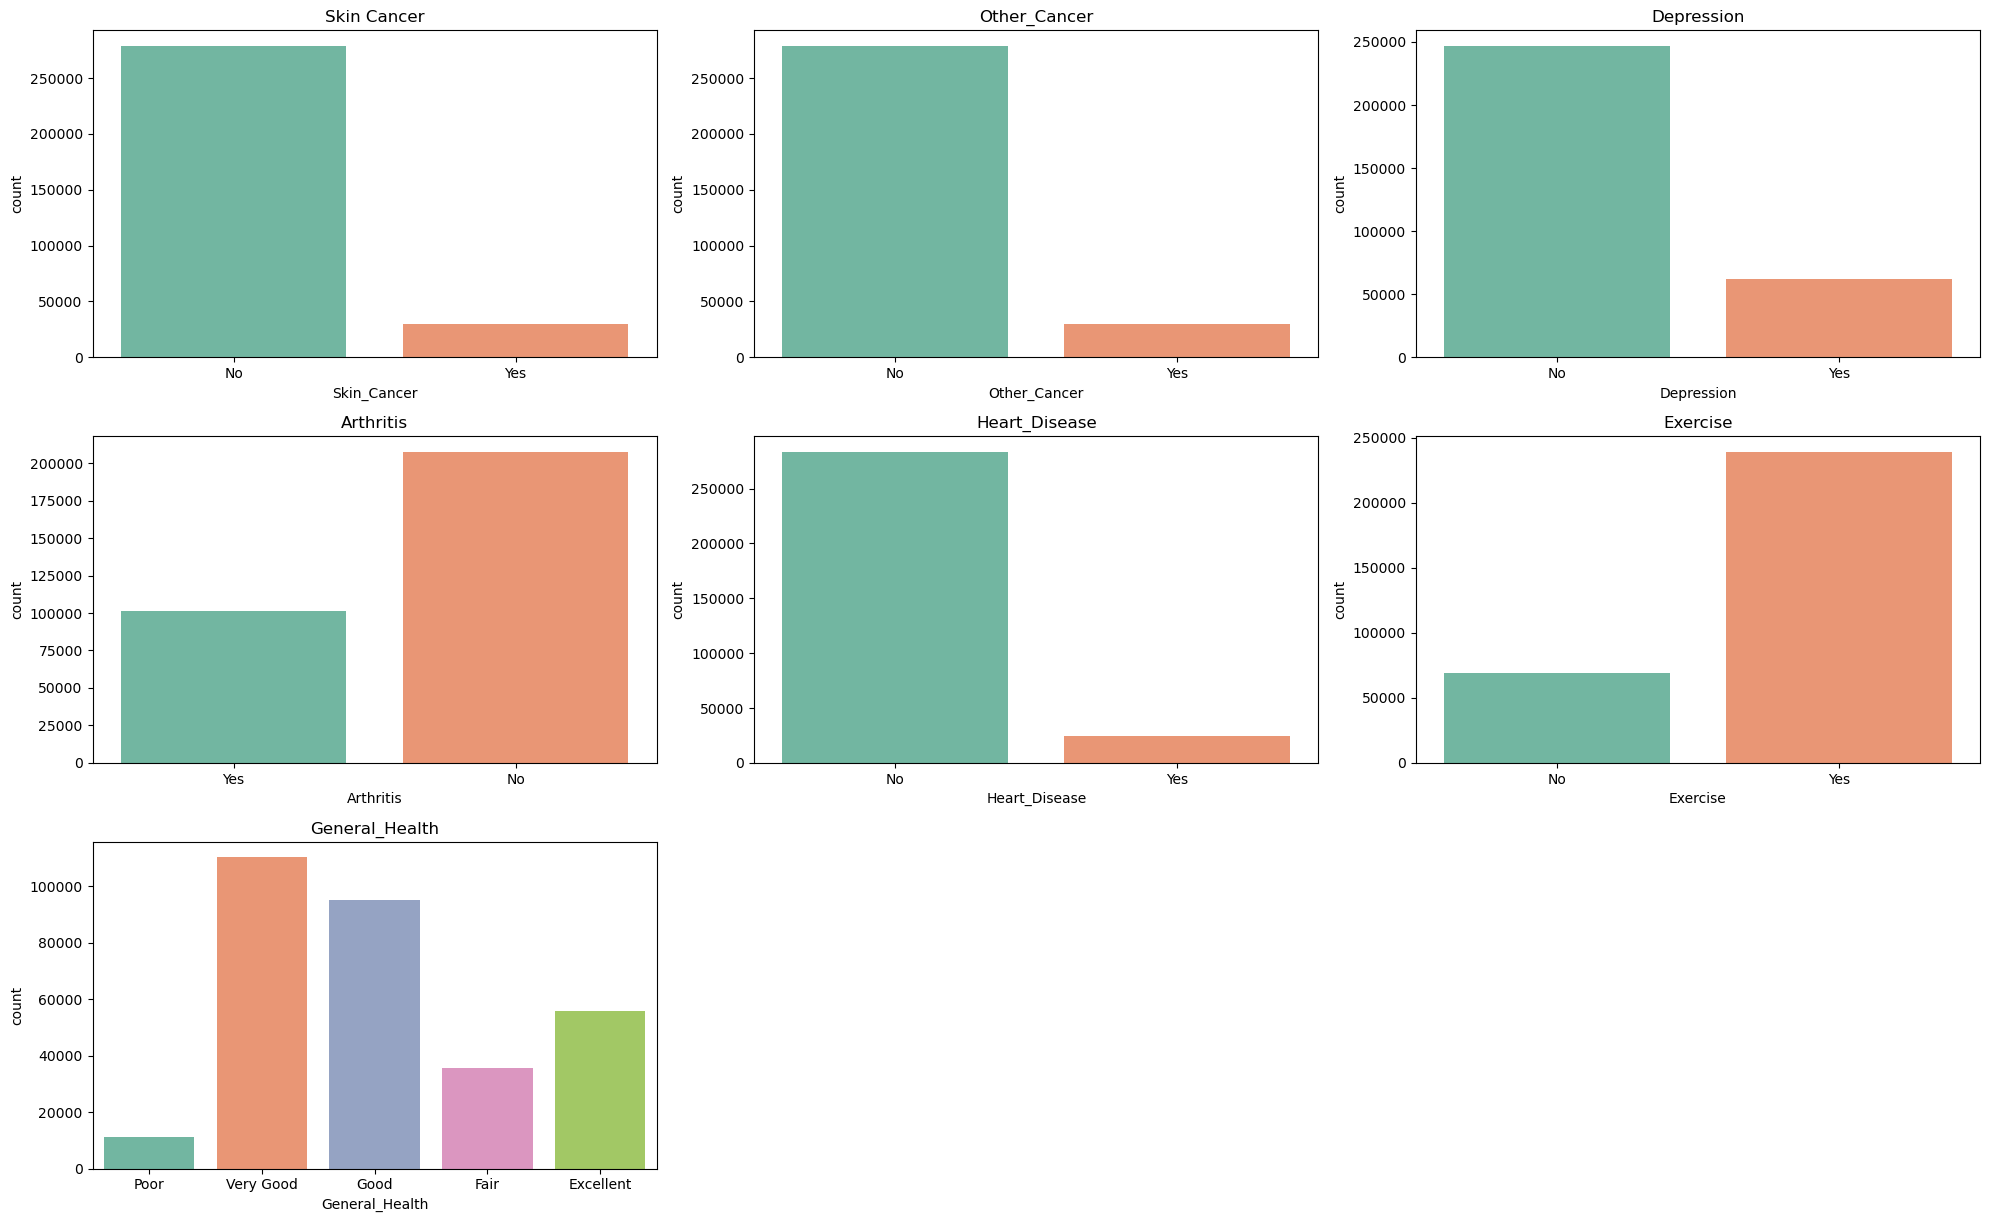

In [148]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 3, 1)
plt.gca().set_title('Skin Cancer')
sns.countplot(x = 'Skin_Cancer', palette = 'Set2', data = df)

plt.subplot(5, 3, 2)
plt.gca().set_title('Other_Cancer')
sns.countplot(x = 'Other_Cancer', palette = 'Set2', data = df)

#plt.subplot(5, 3, 3)
#plt.gca().set_title('Diabetes')
#sns.countplot(x = 'Diabetes', palette = 'Set2', data = df)
plt.subplot(5, 3, 3)
plt.gca().set_title('Depression')
sns.countplot(x = 'Depression', palette = 'Set2', data = df)
plt.subplot(5, 3, 4)
plt.gca().set_title('Arthritis')
sns.countplot(x = 'Arthritis', palette = 'Set2', data = df)
#plt.subplot(5, 3, 6)
#plt.gca().set_title('Checkup')
#sns.countplot(x = 'Checkup', palette = 'Set2', data = df)
plt.subplot(5, 3, 5)
plt.gca().set_title('Heart_Disease')
sns.countplot(x = 'Heart_Disease', palette = 'Set2', data = df)
plt.subplot(5, 3, 6)
plt.gca().set_title('Exercise')
sns.countplot(x = 'Exercise', palette = 'Set2', data = df)
plt.subplot(5, 3, 7)
plt.gca().set_title('General_Health')
sns.countplot(x = 'General_Health', palette = 'Set2', data = df)
plt.tight_layout()
plt.show()

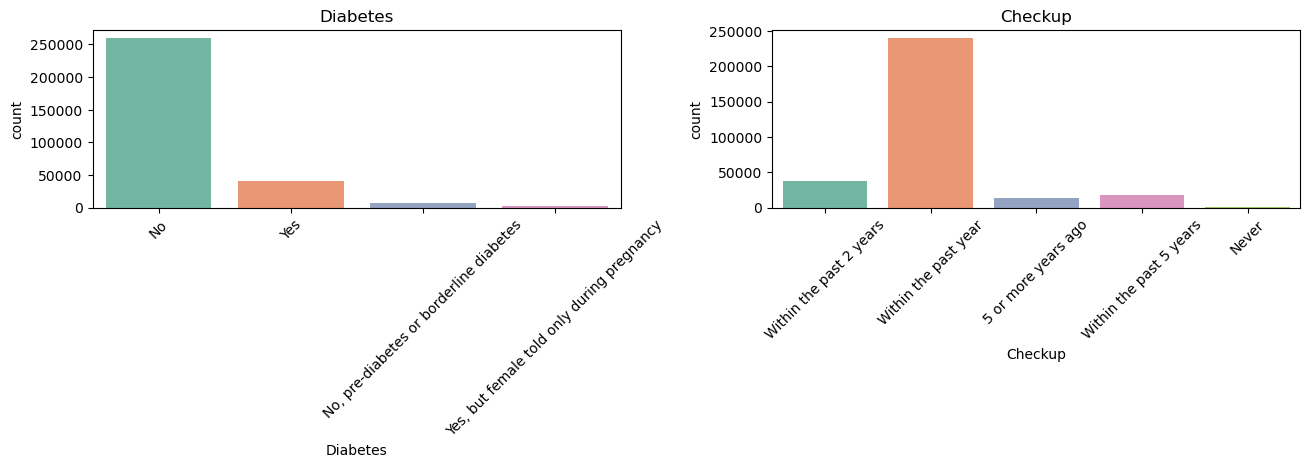

In [149]:
plt.figure(figsize=(20, 20))

plt.subplot(5, 3, 1)
plt.gca().set_title('Diabetes')
sns.countplot(x='Diabetes', palette='Set2', data=df)
plt.xticks(rotation=45)

plt.subplot(5, 3, 2)
plt.gca().set_title('Checkup')
sns.countplot(x='Checkup', palette='Set2', data=df)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **Result of Univariate Analaysis(Categorical Variable) :** 
#### When we look at our categorical variables we can see that we do not have a pattern in most variables with practically all of them showing a balance in some data and not in others.

### **Lets Analyze Continuous Variable**

In [38]:
Continuous_Variable=df.columns[df.dtypes!='object']
Continuous_Variable

Index(['index', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

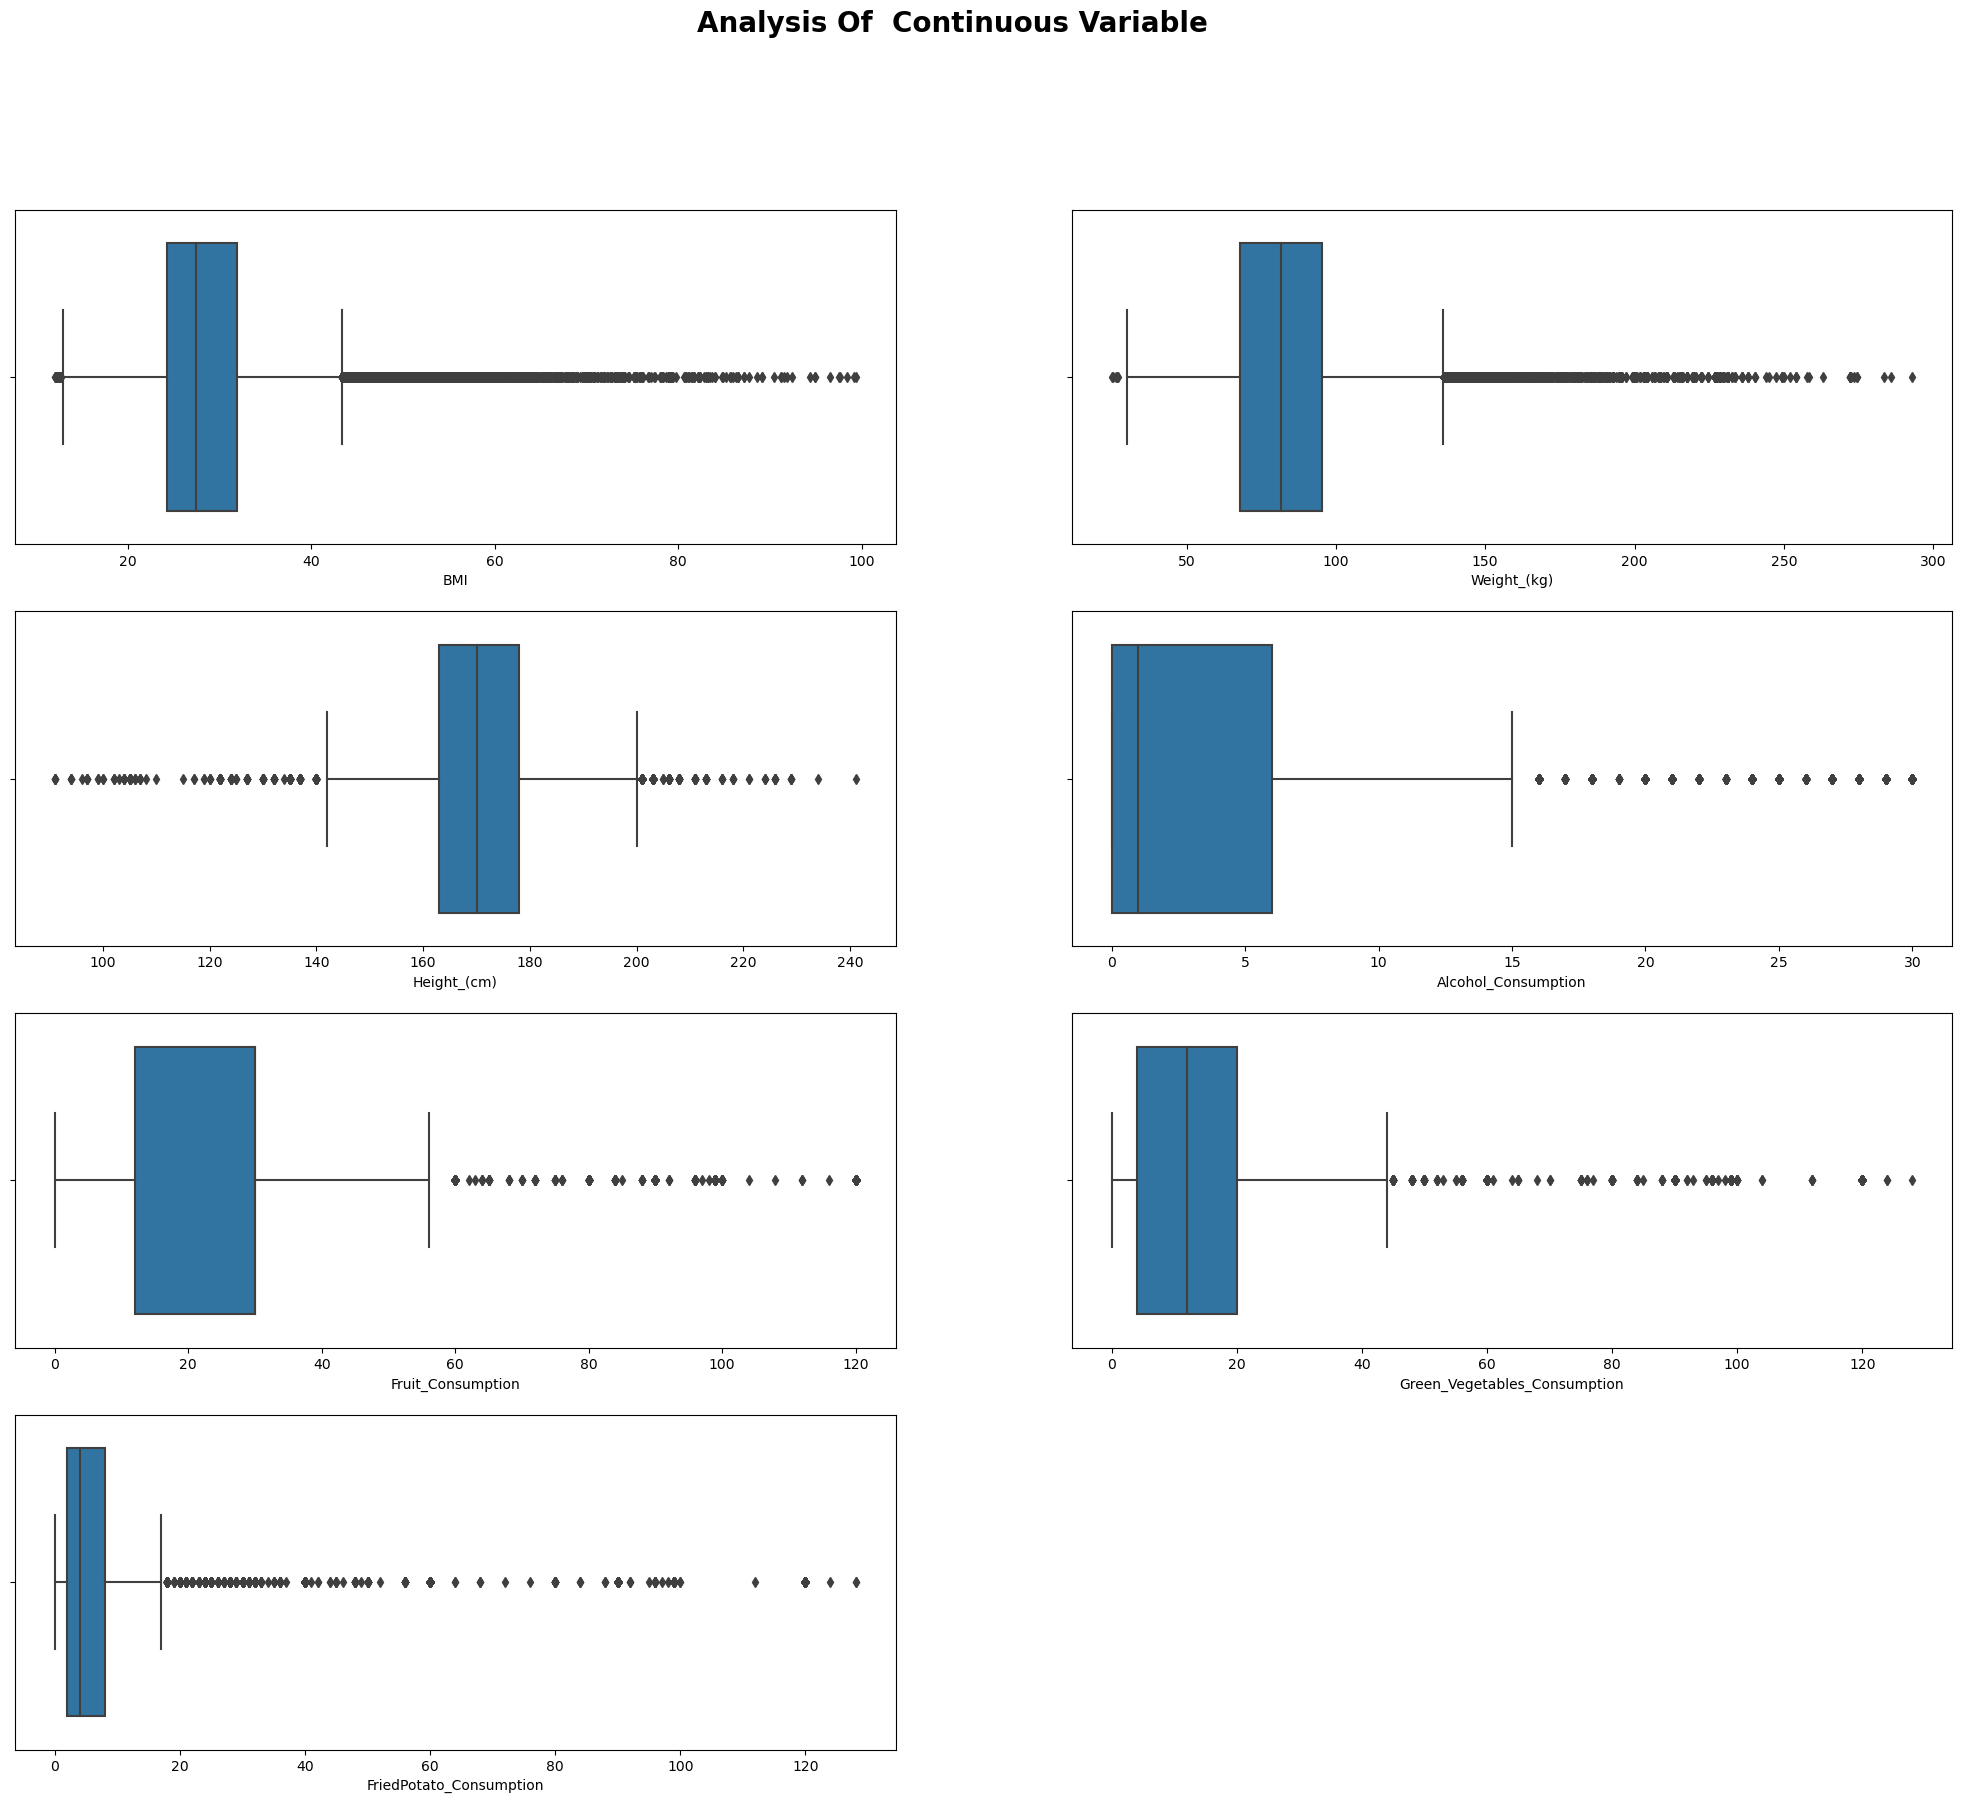

In [151]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of  Continuous Variable",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x='BMI', data=df)

plt.subplot(4,2,2)
sns.boxplot(x='Weight_(kg)', data=df)

plt.subplot(4,2,3)
sns.boxplot(x='Height_(cm)', data=df)

plt.subplot(4,2,4)
sns.boxplot(x='Alcohol_Consumption', data=df)

plt.subplot(4,2,5)
sns.boxplot(x='Fruit_Consumption', data=df)

plt.subplot(4,2,6)
sns.boxplot(x='Green_Vegetables_Consumption', data=df)

plt.subplot(4,2,7)
sns.boxplot(x='FriedPotato_Consumption', data=df)

plt.show()

#### **Result of Univariate Analaysis(Continuous  Variable) :** 
#### When we look at our Continuous variables we can see that we have pattern in some of the variable and some other variables have outliers like **FriedPotato_Consumption,Weight_(Kg),Greeen_vegetables_Consumption**(we will se about that though).

## **Bivariate Analysis**
### Lets analyse Categorical Variable first with our target variable 

In [152]:
categorical_variable

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')

<Axes: title={'center': 'Age Category'}, xlabel='Age_Category', ylabel='count'>

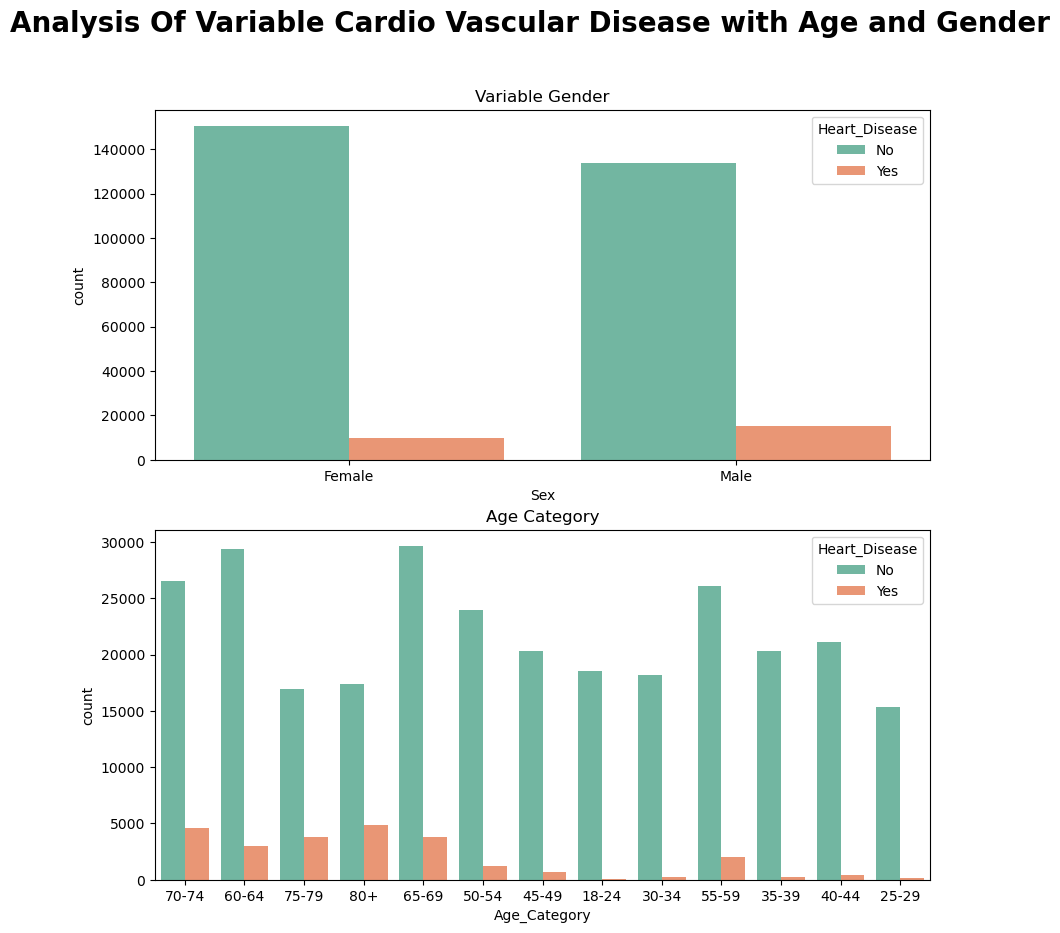

In [153]:
plt.figure(figsize = (10, 10))
plt.suptitle("Analysis Of Variable Cardio Vascular Disease with Age and Gender",fontweight="bold", fontsize=20)

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Sex', hue = 'Heart_Disease', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Age Category')
sns.countplot(x = 'Age_Category', hue = 'Heart_Disease', palette = 'Set2', data = df)

#### As we can see in above figure AgeCategory and Gender has more **No** then **yes** .And female have less heart disease then male enad every age category have less disease.

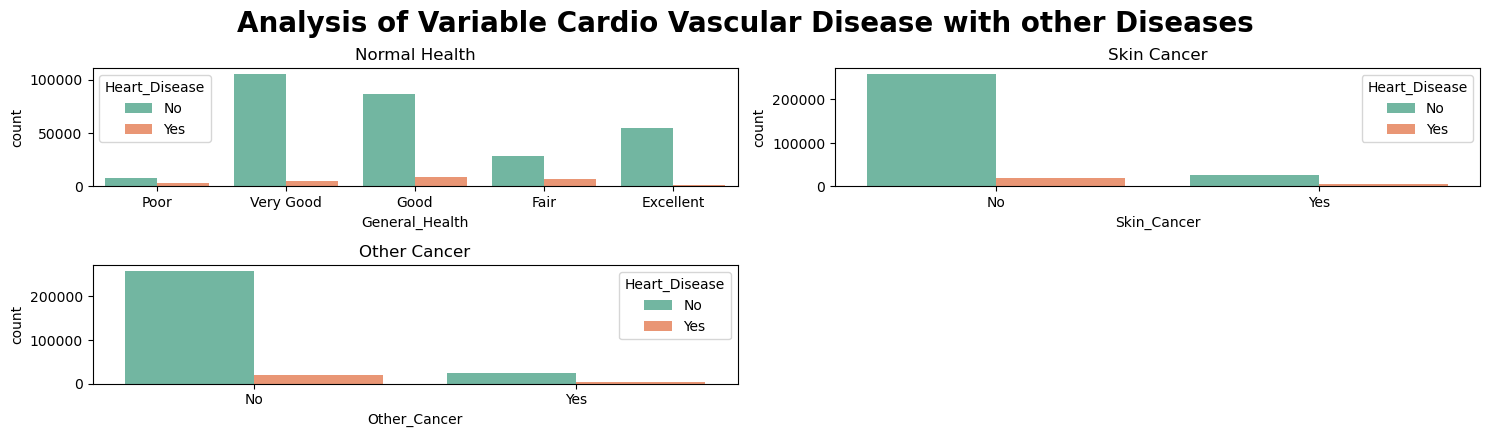

In [154]:
plt.figure(figsize=(15, 10))
plt.suptitle("Analysis of Variable Cardio Vascular Disease with other Diseases", fontweight="bold", fontsize=20)

plt.subplot(5, 2, 1)
plt.gca().set_title('Normal Health')
sns.countplot(x='General_Health', hue='Heart_Disease', palette='Set2', data=df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Skin Cancer')
sns.countplot(x='Skin_Cancer', hue='Heart_Disease', palette='Set2', data=df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Other Cancer')
sns.countplot(x='Other_Cancer', hue='Heart_Disease', palette='Set2', data=df)
plt.tight_layout()
plt.show()


#### Above figures Clearly describe that the people who have Other disease and Normal or good health have less chances of heart disease though.

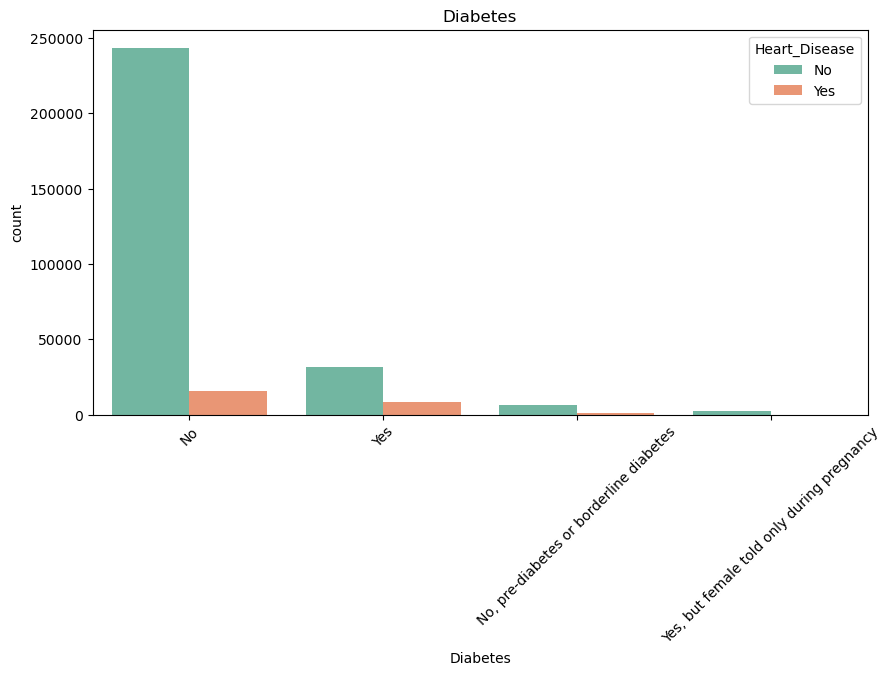

In [155]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.gca().set_title('Diabetes')
sns.countplot(x='Diabetes', hue='Heart_Disease', palette='Set2', data=df)
plt.xticks(rotation=45)
plt.show()

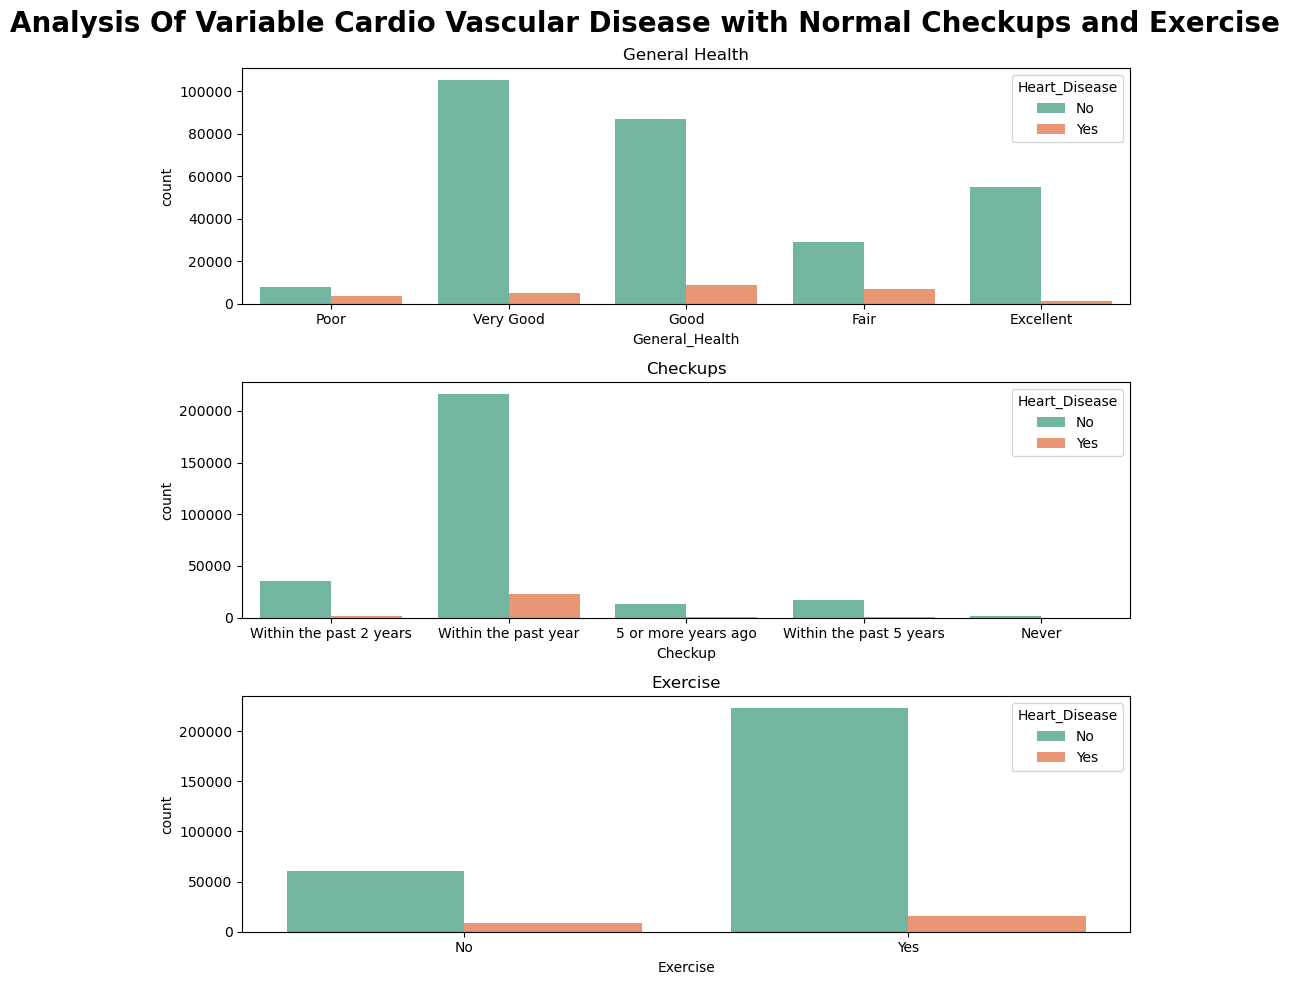

In [156]:
plt.figure(figsize = (10, 10))
plt.suptitle("Analysis Of Variable Cardio Vascular Disease with Normal Checkups and Exercise",fontweight="bold", fontsize=20)

plt.subplot(3, 1, 1)
plt.gca().set_title('General Health')
sns.countplot(x = 'General_Health', hue = 'Heart_Disease', palette = 'Set2', data = df)

plt.subplot(3, 1, 2)
plt.gca().set_title('Checkups')
sns.countplot(x = 'Checkup', hue = 'Heart_Disease', palette = 'Set2', data = df)

plt.subplot(3, 1, 3)
plt.gca().set_title('Exercise')
sns.countplot(x = 'Exercise', hue = 'Heart_Disease', palette = 'Set2', data = df)
plt.tight_layout()
plt.show()

#### Above figure clearly showing that the people who exercise and do checkup have large number of **No** means they less tend to have cardio-vascular disease

### Linear relationship between Continuous Variable

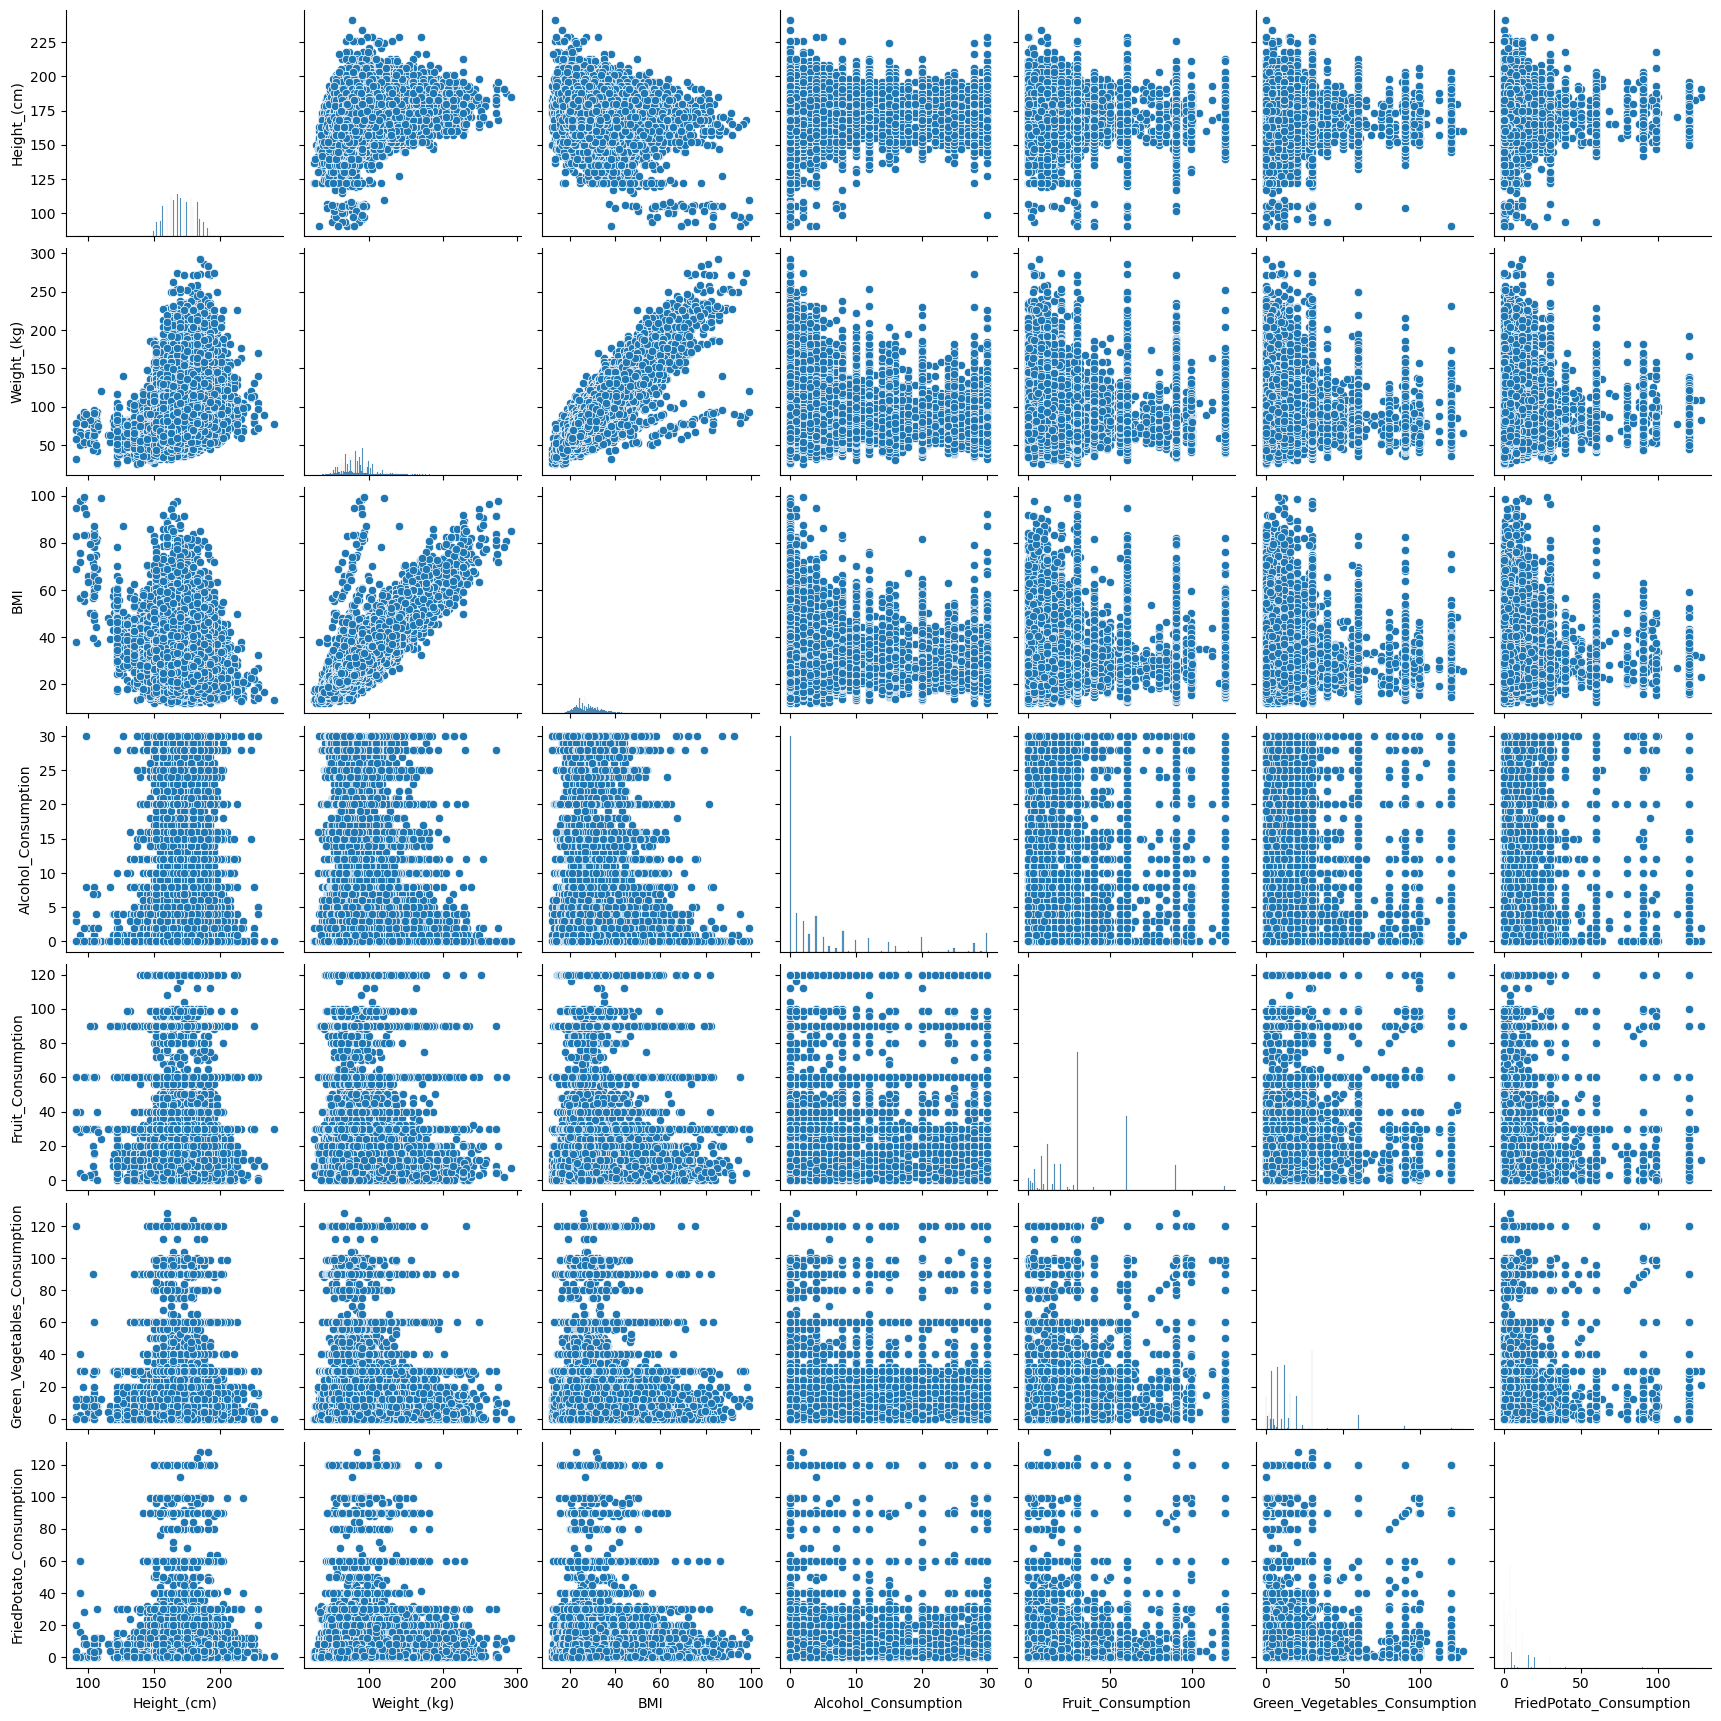

In [157]:
sns.pairplot(data=df[Continuous_Variable])

### According to above pair plot **BMI and Weight_(KG)** are have linear relationship

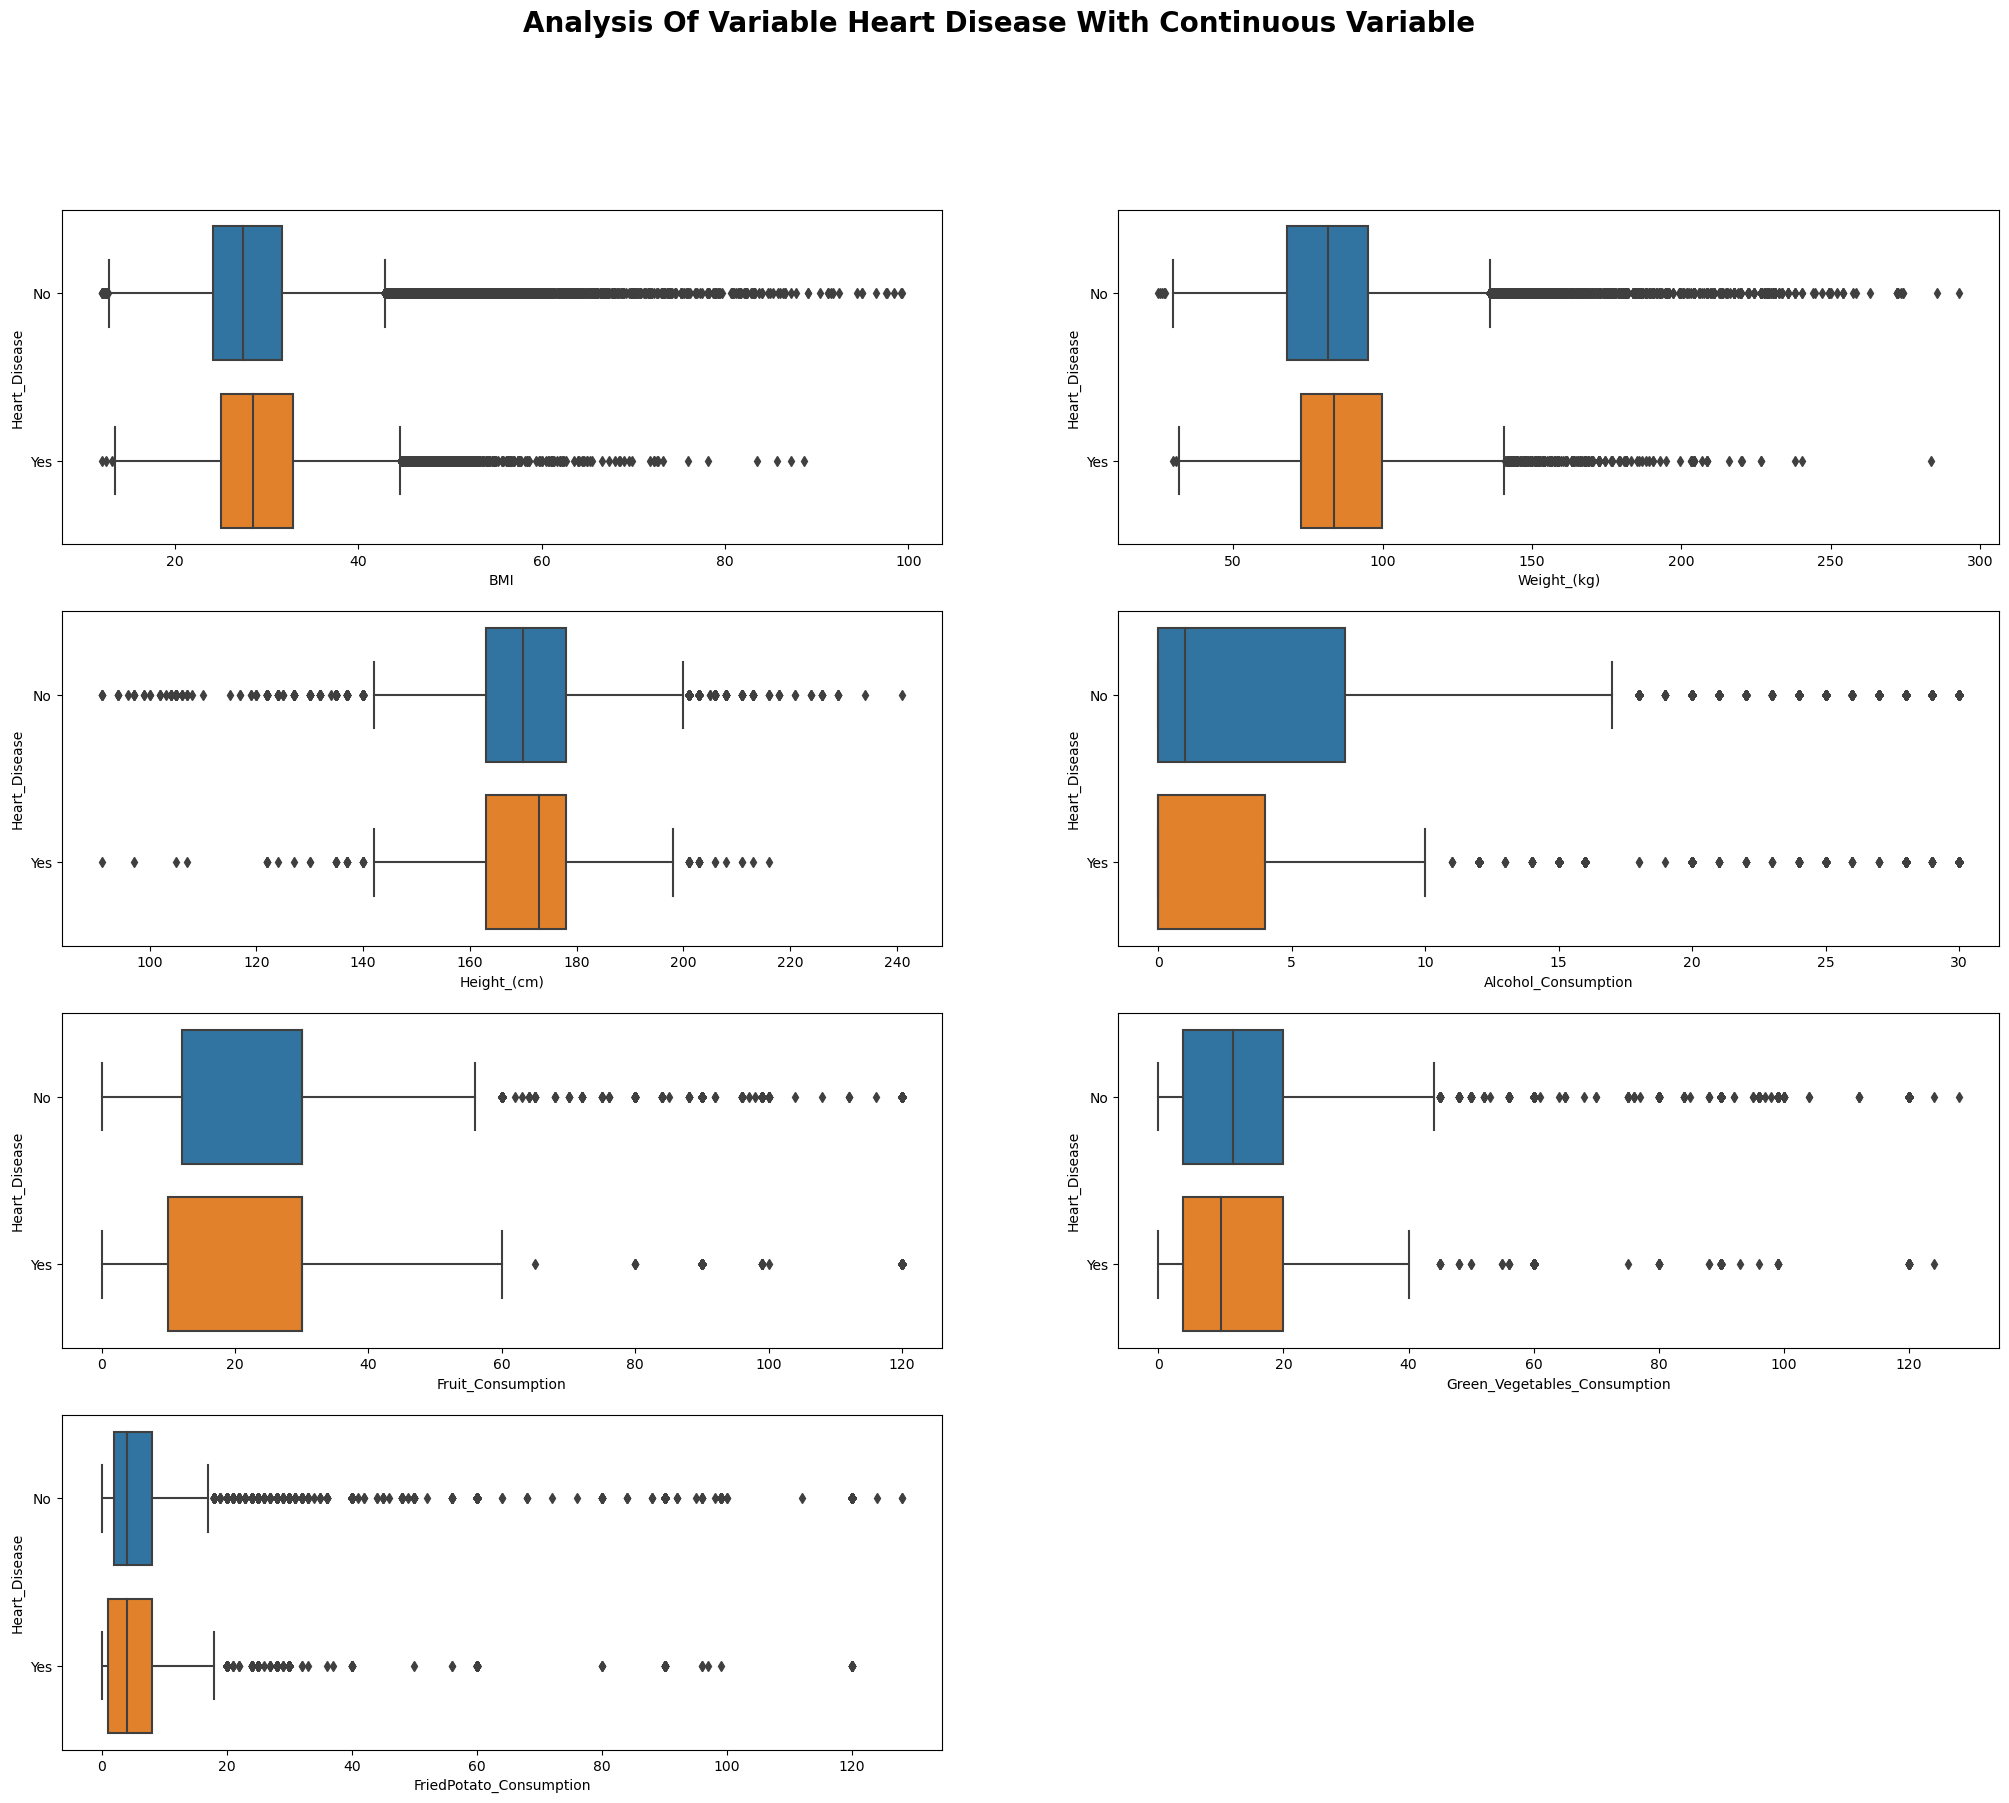

In [158]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Heart Disease With Continuous Variable",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x='BMI', y="Heart_Disease", data=df)

plt.subplot(4,2,2)
sns.boxplot(x='Weight_(kg)', y="Heart_Disease", data=df)

plt.subplot(4,2,3)
sns.boxplot(x='Height_(cm)', y="Heart_Disease", data=df)

plt.subplot(4,2,4)
sns.boxplot(x='Alcohol_Consumption', y="Heart_Disease", data=df)

plt.subplot(4,2,5)
sns.boxplot(x='Fruit_Consumption', y="Heart_Disease", data=df)

plt.subplot(4,2,6)
sns.boxplot(x='Green_Vegetables_Consumption', y="Heart_Disease",data=df)
plt.subplot(4,2,7)
sns.boxplot(x='FriedPotato_Consumption', y="Heart_Disease", data=df)

plt.show()

#### Above figure are showing that the Continuous Variable has Outliers 

## **Result of Bivariate Analysis**
* Female have more Cardio-Vascular Disease than Men
* The People have other disease tend to have less cardio-vascular disease 
* Age Category 65-70 have less more number of no. means they have less chances to have cardio-vascular disease 
* The people who exercise more and do checkups tend to have less cardio-vascular disease
* The people who are suffering from diasbetes have less chances to have cardio-vascular disease 

##  Checking some **Outliers & relationships** in Continuous Variable 

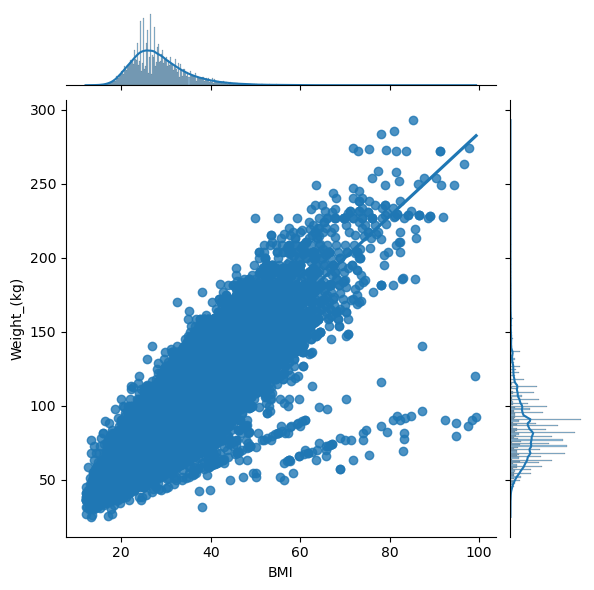

In [159]:
sns.jointplot(x="BMI",y='Weight_(kg)',data=df,kind='reg')

### As we an see in Above figure BMI and Weight_kg have linear relationship 
* we have to remove one of them other wise they will introduce **multicollinearity** in our features 

###  Continuous variable

In [160]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

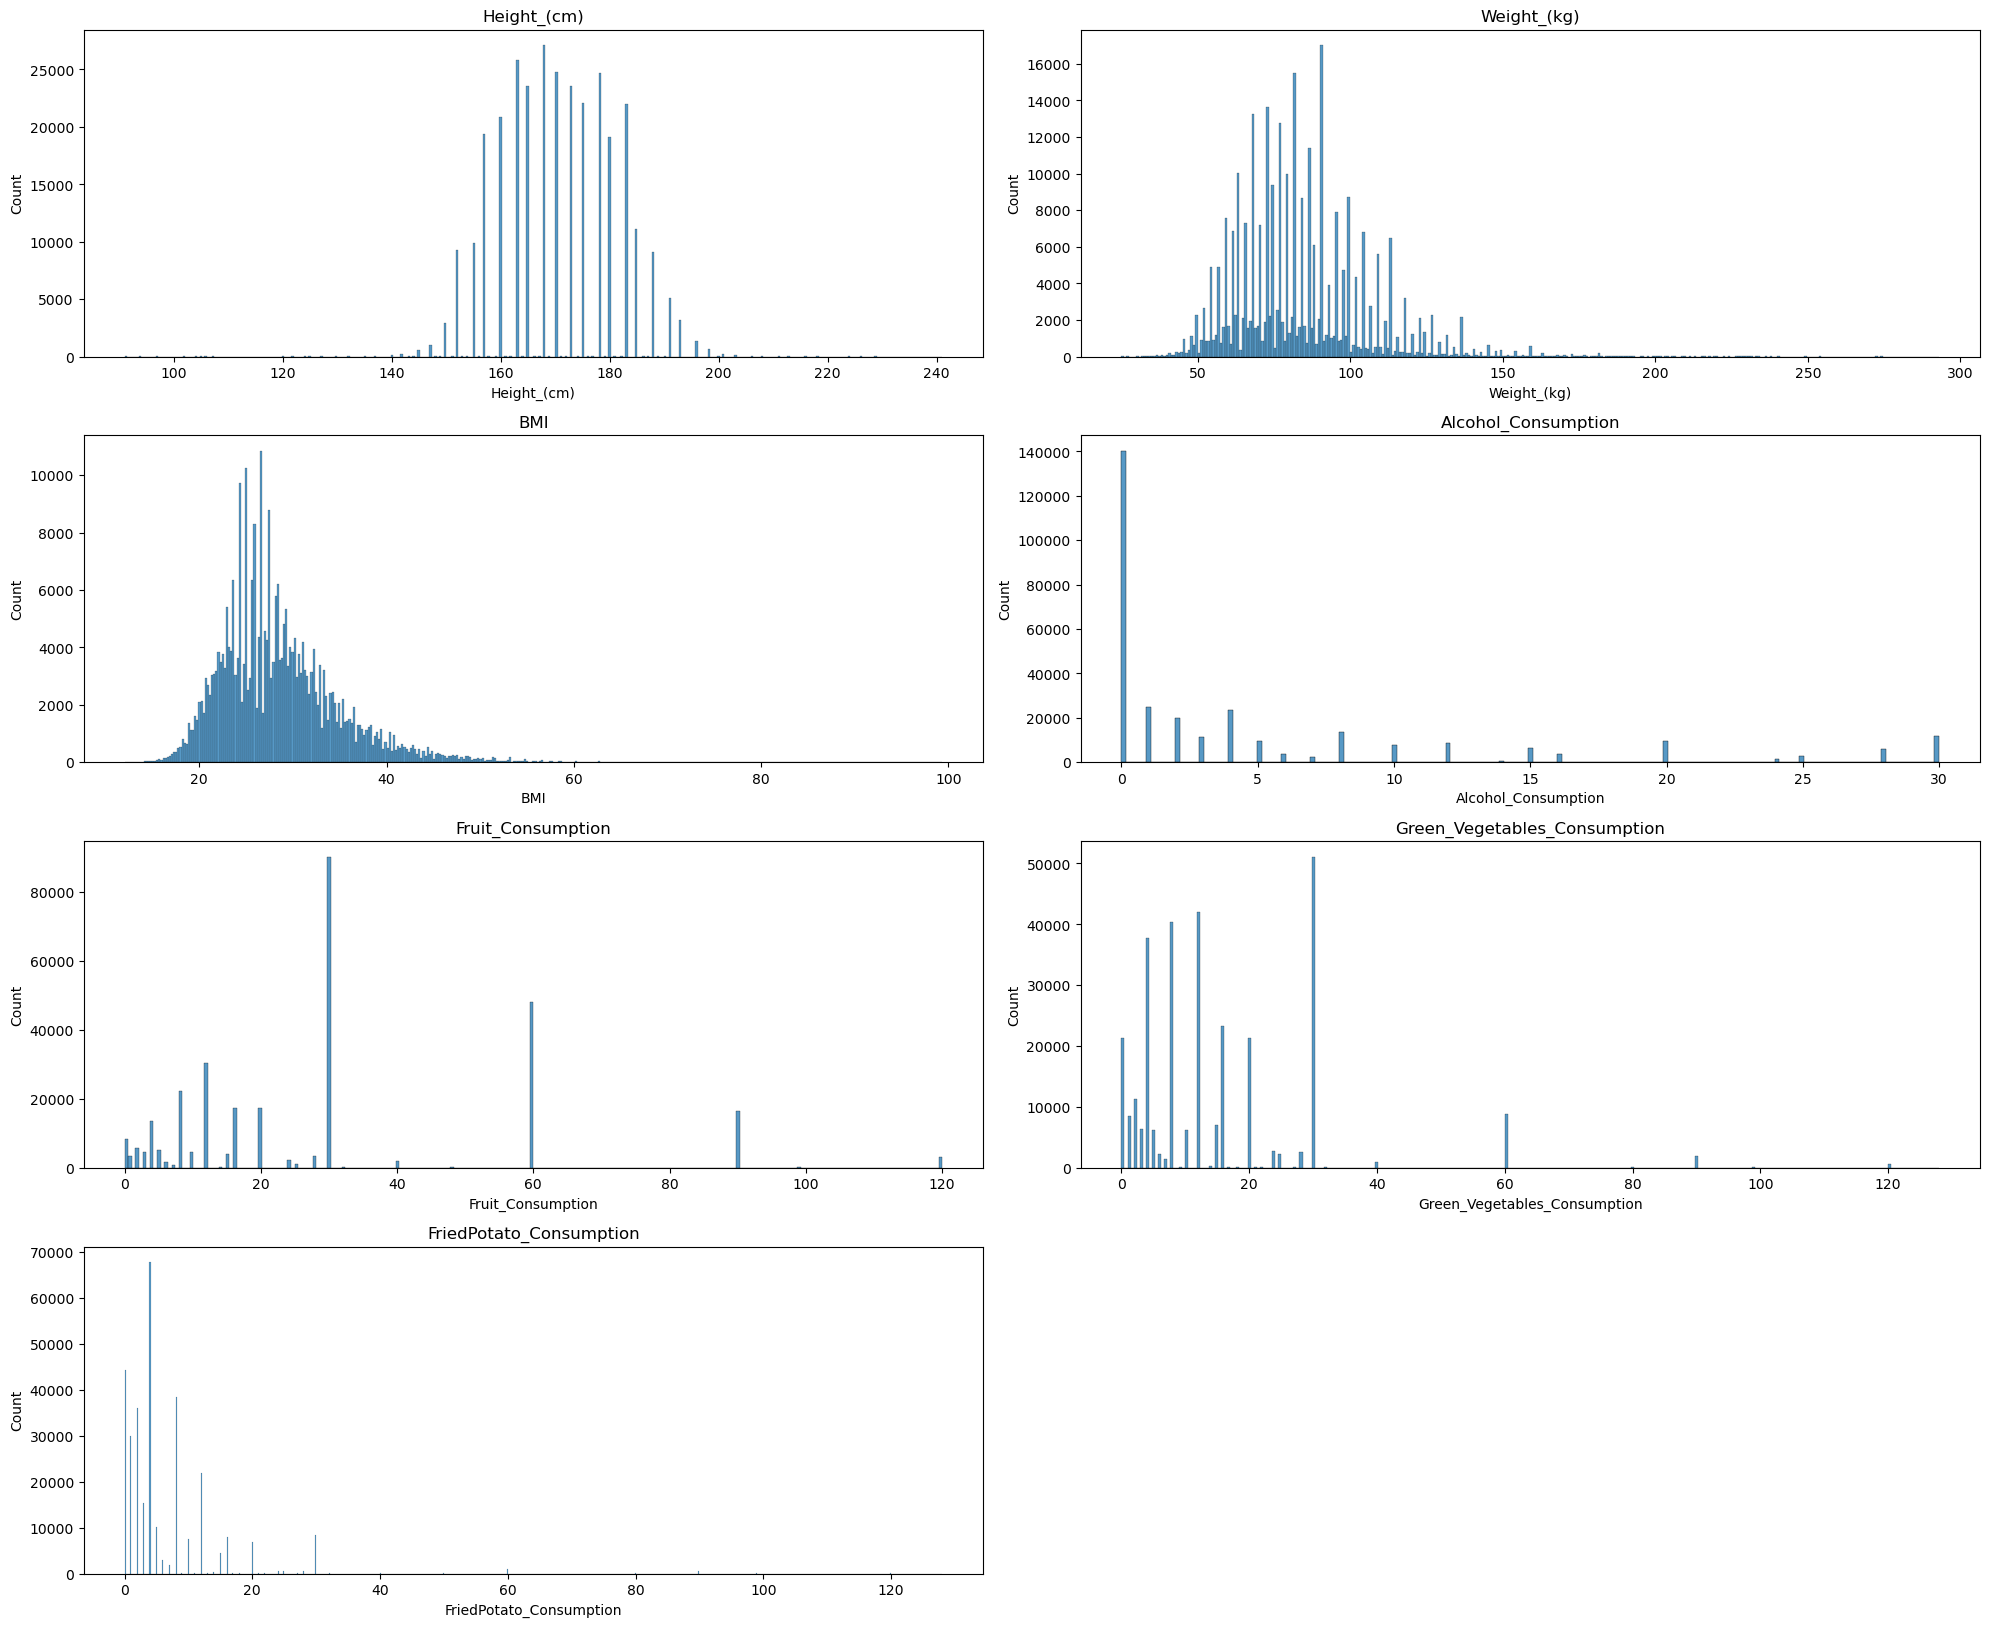

In [161]:
plt.figure(figsize = (20, 20))
for i,col in enumerate(Continuous_Variable):
    plt.subplot(5, 2, i+1)
    plt.gca().set_title(col)
    sns.histplot(x = df[col], data = df)
plt.tight_layout()
plt.show()

### Above figure clearly showing that 
#### 1. Columns **(BMI ,'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption')** has **outliers** 

#### 2. They are also have the **Skewed Distribution** Meanwhile **Weight kg and Height_cm have the Gaussian Distribution**

# **Data Preprocessing** 

## Dealing with ouliers in the Continuous Variable first

### **Extracting Outliers**
1. Here we are checking the **z-score** of the every Continuous Variable and we have set threshold for checking outliers is  3.
2. **Threshold** 3 is beacuse we are trying to be less conservative towards the  features.  
3. if a columns has any outliers we are processing it further

In [39]:
import numpy as np
from scipy.stats import zscore
outliers_columns=[]
for col in Continuous_Variable:
    # Calculate mean and standard deviation
    mean = np.mean(df[col])
    std = np.std(df[col])

    # Calculate Z-score using formula
    z_scores = [(x - mean) / std for x in df[col].tolist()]

    # Alternatively, calculate Z-score using scipy function
    z_scores = zscore(df[col])

    # Define threshold value
    threshold = 4

    # Find outliers based on Z-score
    outliers = [x for x in df[col] if abs(x - mean) / std > threshold]

    print(f'\n{col}: Outliers: {len(outliers)} Percentage in Data Columns: {((len(outliers) / len(df[col])) * 100):.2f}%')

    if len(outliers)>0:
        outliers_columns.append(col)
        
print('\nColumns with Outliers :',outliers_columns,)



index: Outliers: 0 Percentage in Data Columns: 0.00%

Height_(cm): Outliers: 194 Percentage in Data Columns: 0.06%

Weight_(kg): Outliers: 959 Percentage in Data Columns: 0.31%

BMI: Outliers: 1297 Percentage in Data Columns: 0.42%

Alcohol_Consumption: Outliers: 0 Percentage in Data Columns: 0.00%

Fruit_Consumption: Outliers: 0 Percentage in Data Columns: 0.00%

Green_Vegetables_Consumption: Outliers: 2887 Percentage in Data Columns: 0.93%

FriedPotato_Consumption: Outliers: 1907 Percentage in Data Columns: 0.62%

Columns with Outliers : ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


### Here we are finding the probability that  which columns has the skew  distribuition and which has Gaussian Distribution using the **Skew** funtion

In [40]:
Outliers_df=df[outliers_columns]
Outliers_df.drop('Height_(cm)',axis=1,inplace=True)
# skewness along the index axis
Outliers_skew_prob=pd.DataFrame(Outliers_df.skew(axis = 0, skipna = True),columns=['skew_Probability'])
Outliers_skew_prob.reset_index(inplace=True)
Outliers_skew_prob.rename(columns={'index': 'Columns'}, inplace=True)
Outliers_skew_prob

,Columns,skew_Probability
0,Weight_(kg),1.058099
1,BMI,1.376452
2,Green_Vegetables_Consumption,2.415920
3,FriedPotato_Consumption,4.911907


In [41]:
Outlier_fixed=pd.DataFrame()

### **Fixing The Outliers**

* Here we are finding the lower boundary and upper Boundary for the columns 
* if a columns has skewed distribution or a Gaussian . we are are replacing the outliers with the **upper boundary** of the columns
* The method to find the upper boundary and the lower boundary for the skewed distibutiona and gaussian distribution are **different** though

In [42]:
for i in range(Outliers_skew_prob.shape[0]):
    print(Outliers_skew_prob.iloc[i][0])

    if Outliers_skew_prob.iloc[i][1] > 1.0:
        # Skewed columns

        IQR = Outliers_df[Outliers_skew_prob.iloc[i][0]].quantile(0.75) - Outliers_df[Outliers_skew_prob.iloc[i][0]].quantile(0.25)
        lwb = Outliers_df[Outliers_skew_prob.iloc[i][0]].quantile(0.25) - (IQR * 3)
        upw = Outliers_df[Outliers_skew_prob.iloc[i][0]].quantile(0.75) + (IQR * 3)
        Outliers_df.loc[Outliers_df[Outliers_skew_prob.iloc[i][0]] > upw, Outliers_skew_prob.iloc[i][0]] = upw
        print(f'Column: {Outliers_skew_prob.iloc[i][0]} Distribution: Skewed \nLower Limit: {lwb} \nUpper Limit: {upw}')
    else:
        # Lower limit
        # Assuming data has a Gaussian distribution
        lowb = Outliers_df[Outliers_skew_prob.iloc[i][0]].mean() - 3 * Outliers_df[Outliers_skew_prob.iloc[i][0]].std()
        # Upper limit
        upb = Outliers_df[Outliers_skew_prob.iloc[i][0]].mean() + 3 * Outliers_df[Outliers_skew_prob.iloc[i][0]].std()
        # Managing outliers
        Outliers_df.loc[Outliers_df[Outliers_skew_prob.iloc[i][0]] > upb, Outliers_skew_prob.iloc[i][0]] = upb
        #Outliers_df.loc[Outliers_df[Outliers_skew_prob.iloc[i][0]] < lowb, Outliers_skew_prob.iloc[i][0]] = lowb
        print(f'Column: {Outliers_skew_prob.iloc[i][0]} Distribution: Gaussian \nLower Limit: {lowb} \nUpper Limit: {upb}')

Outliers_df


Weight_(kg)
Column: Weight_(kg) Distribution: Skewed 
Lower Limit: -13.589999999999975 
Upper Limit: 176.88
BMI
Column: BMI Distribution: Skewed 
Lower Limit: 1.2899999999999991 
Upper Limit: 54.77
Green_Vegetables_Consumption
Column: Green_Vegetables_Consumption Distribution: Skewed 
Lower Limit: -44.0 
Upper Limit: 68.0
FriedPotato_Consumption
Column: FriedPotato_Consumption Distribution: Skewed 
Lower Limit: -16.0 
Upper Limit: 26.0


,Weight_(kg),BMI,Green_Vegetables_Consumption,FriedPotato_Consumption
0,32.66,14.54,16.0,12.0
1,77.11,28.29,0.0,4.0
2,88.45,33.47,3.0,16.0
3,93.44,28.73,30.0,8.0
4,88.45,24.37,4.0,0.0
...,...,...,...,...
308769,81.65,29.05,8.0,0.0
308770,69.85,21.48,60.0,4.0
308771,61.23,24.69,8.0,4.0
308772,79.38,23.73,12.0,0.0


## Result of Outliers Detection
* Height_(cm) has a very low positive skew, meaning that it is almost symmetric with a slightly longer right tail.<br>
* Weight_(kg) has a moderate positive skew, meaning that it has more observations on the lower end and a few outliers on the higher end.<br>
* BMI has a high positive skew, meaning that it has a very long right tail with many extreme values on the higher end.<br>
* Green_Vegetables_Consumption has a high positive skew, meaning that it has a very long right tail with many extreme values on the higher end.<br>
* FriedPotato_Consumption has a very high positive skew, meaning that it has a very long right tail with many extreme values on the higher end.<br>

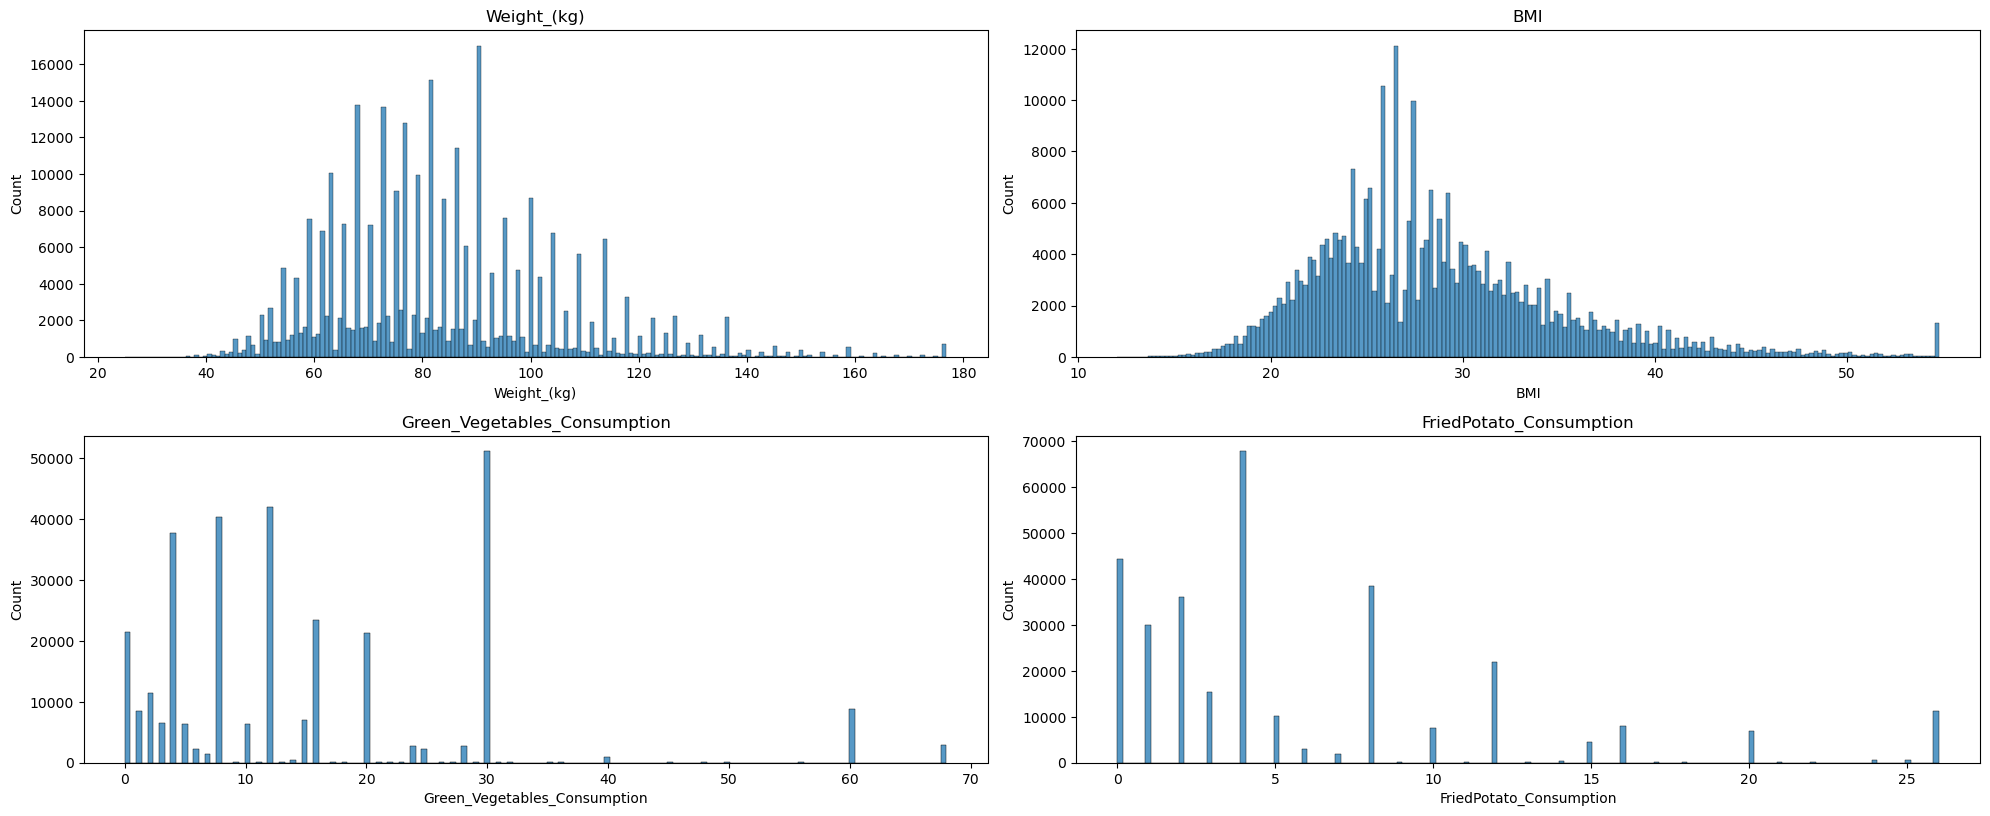

In [43]:
plt.figure(figsize = (20, 20))
for i,col in enumerate(Outliers_df.columns):
    plt.subplot(5, 2, i+1)
    plt.gca().set_title(col)
    sns.histplot(x = Outliers_df[col], data = df)
plt.tight_layout()
plt.show()

In [44]:
df

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308770,308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308771,308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308772,308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [45]:
#Dropping the weight variable and keeping the BMI 
df.drop(Outliers_df.columns,axis=1,inplace=True)
df_o=pd.concat([df,Outliers_df],axis=1)
df_o.drop('Weight_(kg)',axis=1,inplace=True)
df_o

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Smoking_History,Alcohol_Consumption,Fruit_Consumption,BMI,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,Yes,0.0,30.0,14.54,16.0,12.0
1,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,No,0.0,30.0,28.29,0.0,4.0
2,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,No,4.0,12.0,33.47,3.0,16.0
3,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,No,0.0,30.0,28.73,30.0,8.0
4,4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,Yes,0.0,8.0,24.37,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,No,4.0,30.0,29.05,8.0,0.0
308770,308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,No,8.0,15.0,21.48,60.0,4.0
308771,308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,Yes,4.0,40.0,24.69,8.0,4.0
308772,308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,No,3.0,30.0,23.73,12.0,0.0


#### data without outliers saved in the df_o

## Values Mapping

In [46]:
# Update 'Age_Category' column with average values, handling "80+" separately
df_o['Age_Category'] = df_o['Age_Category'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x else int(x.split('+')[0]))
df_o['Age_Category']

0         72.0
1         72.0
2         62.0
3         77.0
4         80.0
          ... 
308769    27.0
308770    67.0
308771    32.0
308772    67.0
308773    47.0
Name: Age_Category, Length: 308774, dtype: float64

In [47]:
#Extracting the heart Disease variable we will mapp it in a different way
target_variable=df_o['Heart_Disease']
df_o.drop('Heart_Disease',axis=1,inplace=True)
cat_variable=df_o.columns[df_o.dtypes=='object']
cat_variable

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
#target variable mapping using label encoder
target_encoder=LabelEncoder()
y=target_encoder.fit_transform(target_variable)

In [49]:
#other columns mapping using the label encoder
label_encoder = LabelEncoder()
df_o[cat_variable] = df_o[cat_variable].apply(label_encoder.fit_transform)


In [52]:
# Update 'Age_Category' column with average values, handling "80+" separately in original data too..
df['Age_Category'] = df['Age_Category'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x else int(x.split('+')[0]))
df['Age_Category']

0         72.0
1         72.0
2         62.0
3         77.0
4         80.0
          ... 
308769    27.0
308770    67.0
308771    32.0
308772    67.0
308773    47.0
Name: Age_Category, Length: 308774, dtype: float64

## Splitting the data(test_size=20%)

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_o,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((247019, 17), (61755, 17))

In [173]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

# scaling the features to one -scale 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [174]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
accuracy_={}
# Assuming you have your true labels (y_true) and predicted labels (y_pred)
def metric_function(y_true,y_pred,name):
    m_list=[]
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    m_list.append(accuracy)
    # Precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print("Precision:", precision)
    m_list.append(precision)
    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')
    print("Recall:", recall)
    m_list.append(recall)
    # F1-Score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print("F1-Score:", f1)
    m_list.append(f1)
    # Classification Report
    report = classification_report(y_true, y_pred)
    print("Classification Report:\n", report)
    accuracy_[name]=m_list
    # Assuming you have your true labels (y_true) and predicted labels (y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Get unique class labels and their corresponding names
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    actual_labels = target_encoder.inverse_transform(unique_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(actual_labels))
    plt.xticks(tick_marks, actual_labels, rotation=45)
    plt.yticks(tick_marks, actual_labels)

    # Add labels to each cell
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

## **Training and Testing Base Line models**

## Training models with all features

Accuracy: 0.917852805440855
Precision: 0.8859334577084721
Recall: 0.917852805440855
F1-Score: 0.8827258273516817
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.51      0.03      0.05      5078

    accuracy                           0.92     61755
   macro avg       0.71      0.51      0.51     61755
weighted avg       0.89      0.92      0.88     61755



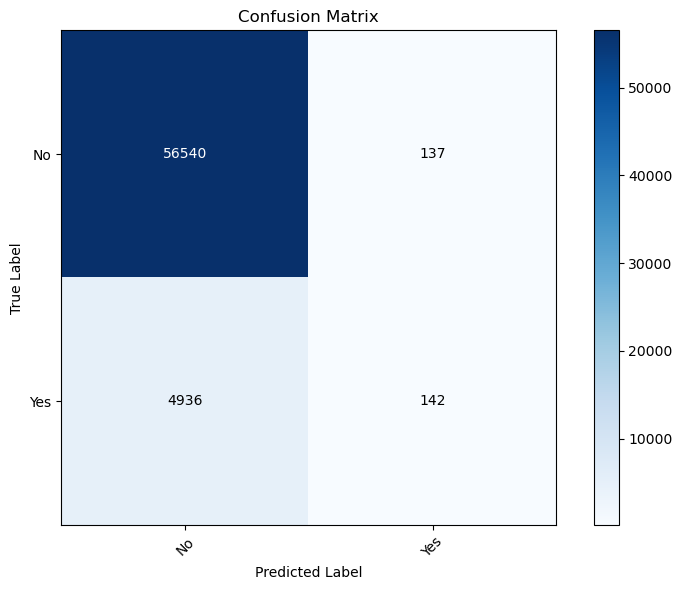

In [175]:
lr= LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
metric_function(y_test,y_pred,'LogisticRegression')

Accuracy: 0.9181604728362076
Precision: 0.8897412715103142
Recall: 0.9181604728362076
F1-Score: 0.8820592896357359
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.56      0.02      0.04      5078

    accuracy                           0.92     61755
   macro avg       0.74      0.51      0.50     61755
weighted avg       0.89      0.92      0.88     61755



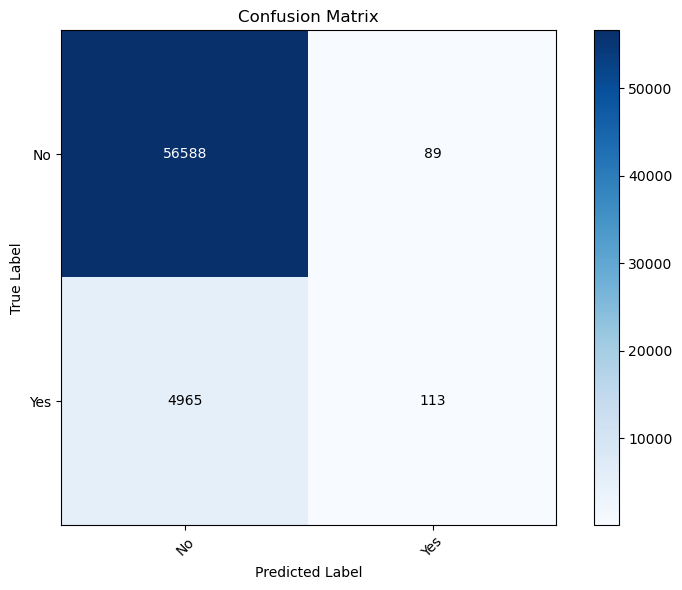

In [176]:
dt= DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_scaled,y_train)
y_pred=dt.predict(X_test_scaled)
metric_function(y_test,y_pred,'DecisionTreeClassifier')

Accuracy: 0.9171726985669176
Precision: 0.8805318352364311
Recall: 0.9171726985669176
F1-Score: 0.8824360047552983
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.44      0.03      0.05      5078

    accuracy                           0.92     61755
   macro avg       0.68      0.51      0.51     61755
weighted avg       0.88      0.92      0.88     61755



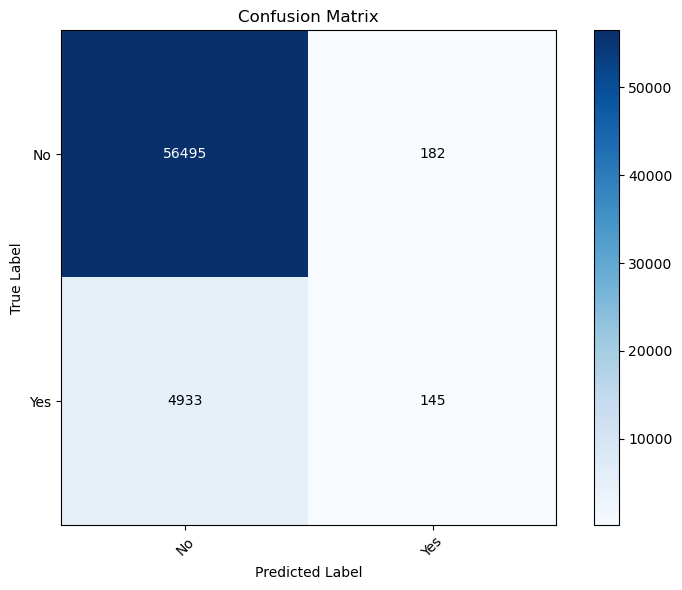

In [177]:
dt= RandomForestClassifier(n_estimators=100)
dt.fit(X_train_scaled,y_train)
y_pred=dt.predict(X_test_scaled)
metric_function(y_test,y_pred,'RandomForestClassifier')

Accuracy: 0.9179499635657031
Precision: 0.8874604077160286
Recall: 0.9179499635657031
F1-Score: 0.8856496243834019
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.51      0.05      0.09      5078

    accuracy                           0.92     61755
   macro avg       0.72      0.52      0.52     61755
weighted avg       0.89      0.92      0.89     61755



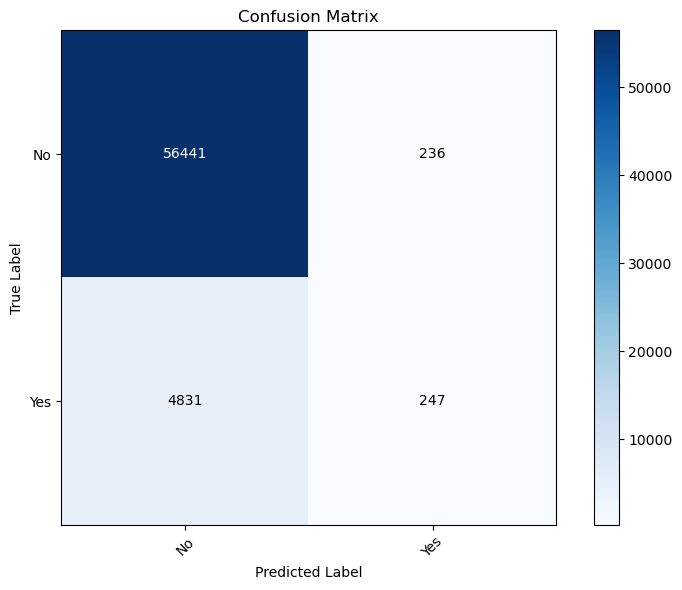

In [178]:
svc=XGBClassifier(n_estimators=100)
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)
metric_function(y_test,y_pred,'XGBClassifier')

Accuracy: 0.8322241114079831
Precision: 0.8854449513309353
Recall: 0.8322241114079831
F1-Score: 0.8547552579020493
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90     56677
           1       0.23      0.43      0.30      5078

    accuracy                           0.83     61755
   macro avg       0.59      0.65      0.60     61755
weighted avg       0.89      0.83      0.85     61755



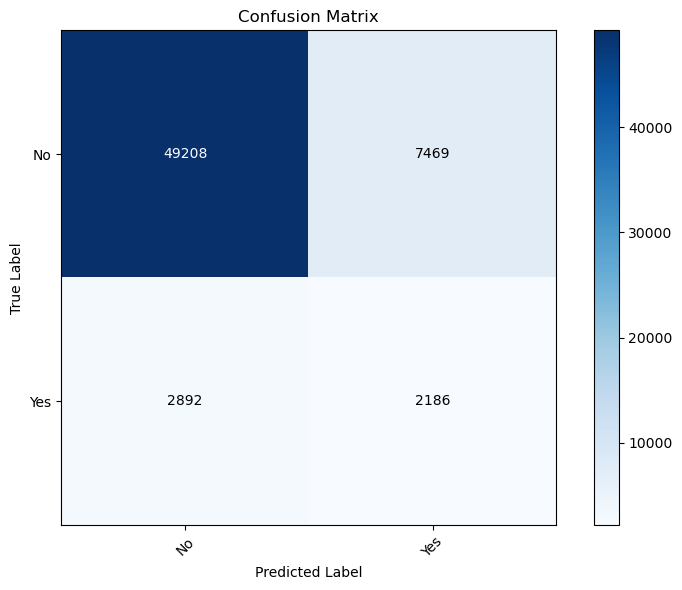

In [179]:
svc=GaussianNB()
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)
metric_function(y_test,y_pred,'GaussianNB')

Accuracy: 0.9181280867945916
Precision: 0.8891226971488801
Recall: 0.9181280867945916
F1-Score: 0.8882185688146551
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     56677
           1       0.52      0.07      0.12      5078

    accuracy                           0.92     61755
   macro avg       0.72      0.53      0.54     61755
weighted avg       0.89      0.92      0.89     61755



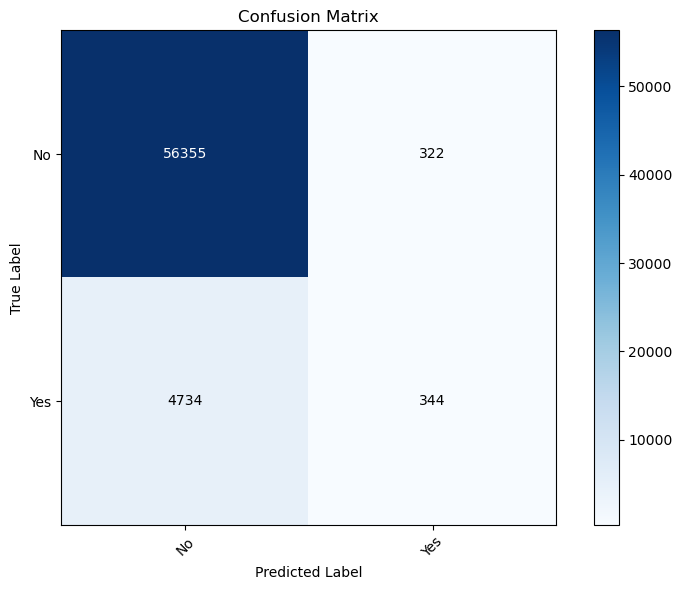

In [180]:
svc=AdaBoostClassifier(n_estimators=100)
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)
metric_function(y_test,y_pred,'AdaBoostClassifier(')

Accuracy: 0.9187110355436807
Precision: 0.8927741928187752
Recall: 0.9187110355436807
F1-Score: 0.8850174938151752
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.58      0.04      0.08      5078

    accuracy                           0.92     61755
   macro avg       0.75      0.52      0.52     61755
weighted avg       0.89      0.92      0.89     61755



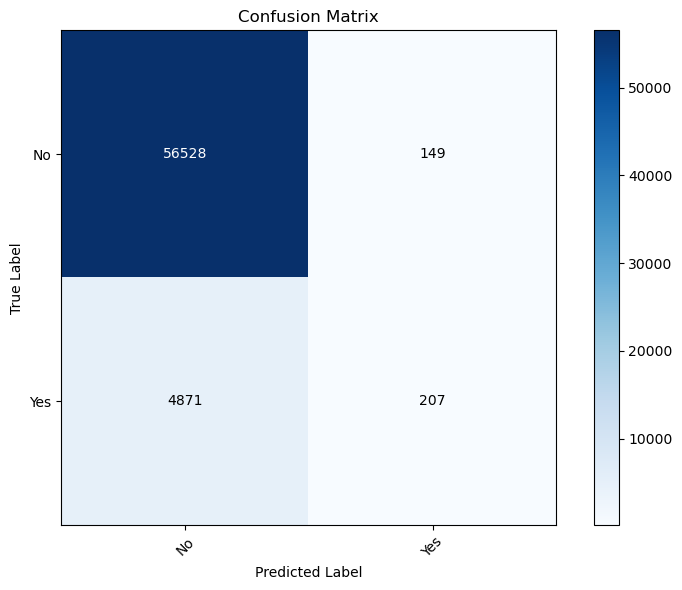

In [181]:
svc=GradientBoostingClassifier(n_estimators=100)
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)
metric_function(y_test,y_pred,'GradientBoostingClassifier')

Accuracy: 0.9091733462877499
Precision: 0.8718746615176968
Recall: 0.9091733462877499
F1-Score: 0.884335205431124
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56677
           1       0.30      0.08      0.13      5078

    accuracy                           0.91     61755
   macro avg       0.61      0.53      0.54     61755
weighted avg       0.87      0.91      0.88     61755



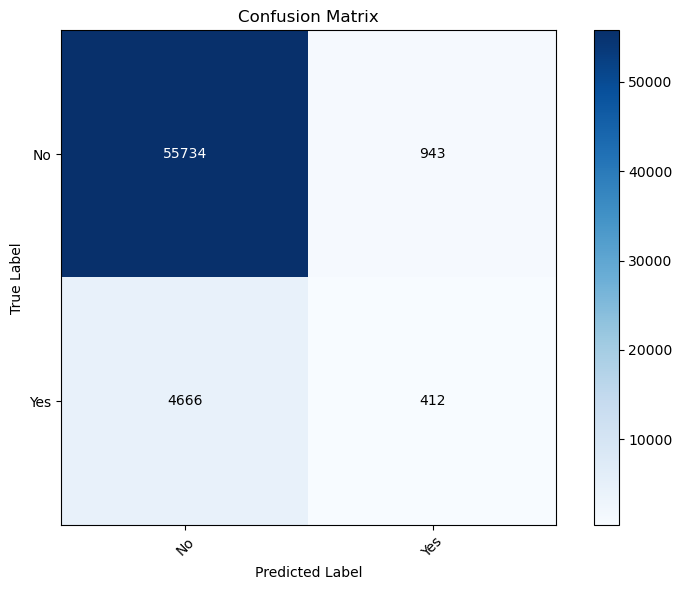

In [182]:
svc=KNeighborsClassifier(n_neighbors=5)
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)
metric_function(y_test,y_pred,'KNeighborsClassifier')

In [203]:
# Create DataFrame
acc_df = pd.DataFrame.from_dict(accuracy_, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1'])
# Sort DataFrame by Accuracy in descending order
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)
#acc_df.rename(columns={'index':'models'},inplace=True)
# Highlight maximum values in each column
styled_acc_df = acc_df.style.highlight_max(axis=0)

styled_acc_df

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.918711,0.892774,0.918711,0.885017
DecisionTreeClassifier,0.918160,0.889741,0.918160,0.882059
AdaBoostClassifier(,0.918128,0.889123,0.918128,0.888219
XGBClassifier,0.917950,0.887460,0.917950,0.885650
LogisticRegression,0.917853,0.885933,0.917853,0.882726
RandomForestClassifier,0.917173,0.880532,0.917173,0.882436
KNeighborsClassifier,0.909173,0.871875,0.909173,0.884335
GaussianNB,0.832224,0.885445,0.832224,0.854755


## Result of Training(BaseLine Model)
* Our best base line model giving the **(92%)** Accuracy,Precision ,F1 Score ,
* lets change this base line models and Do Features selections and Hyper-parameter tunning to Increase the accuracy,and all metrics 

# **Features Selction**
1. Select K-(filter Method) and chi-test
2. RFE-(wrapper Method)
3. Tree-Base Approach

In [258]:
features={}
feat_no=5

## Features Info

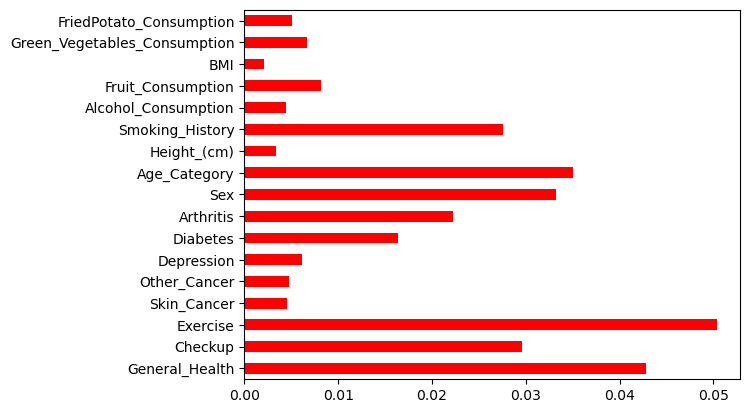

In [259]:
from sklearn.feature_selection import mutual_info_classif

importances=mutual_info_classif(X_train,y_train)
feat_importance=mutual_info_classif(X_train,y_train)
feat_importances=pd.Series(importances,X_train.columns[0:len(X_train.columns)])
feat_importances.plot(kind='barh',color='red')
plt.show()

## Chi_square_Test

In [260]:
from sklearn.feature_selection import SelectKBest, chi2

X_train_cat = X_train.astype(int)

# Select the top K features based on chi-squared statistics
chi2_features = SelectKBest(chi2, k=feat_no)
X_kbest_features = chi2_features.fit_transform(X_train_cat, y_train)

# Get the indices of the selected features
selected_feature_indices = chi2_features.get_support(indices=True)

print('Original Features Number:', X_train_cat.shape[1])
print('Reduced Features Number:', X_kbest_features.shape[1])
print('Selected Feature Indices:', selected_feature_indices)
features[chi2_features]=selected_feature_indices

Original Features Number: 17
Reduced Features Number: 5
Selected Feature Indices: [ 4  6  7  9 12]


## RFE(Recursive Feature Elimination)

In [261]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming X is your feature matrix and y is the corresponding target variable

# Create a machine learning model
model = LogisticRegression()

# Create RFE object with the machine learning model and the desired number of features to select
rfe = RFE(estimator=model, n_features_to_select=feat_no)

# Fit the RFE object to your data
rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

features[rfe]=selected_feature_indices
print(selected_feature_indices)

[ 2  6  7  8 11]


## Tree-based  

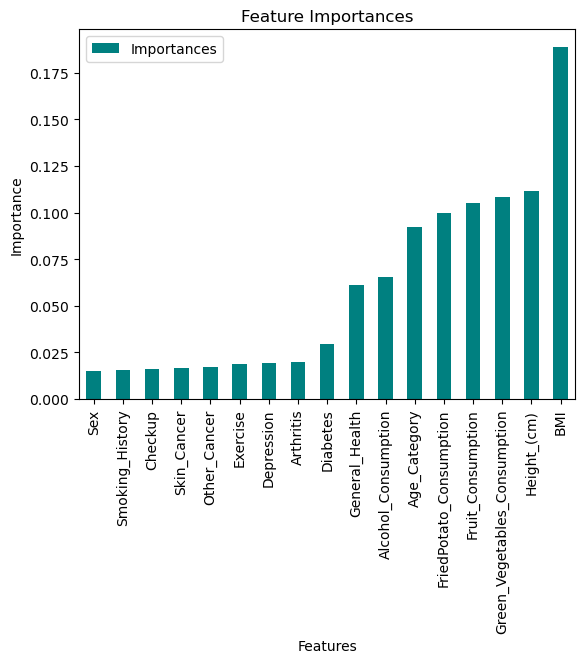

In [262]:

from sklearn.ensemble import RandomForestClassifier

# Assuming X_train is your feature matrix and y_train is the corresponding target variable
# Create a Random Forest classifier
rf = RandomForestClassifier()
# Fit the classifier to your data
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
# Sort indices based on feature importance
sorted_indices = np.argsort(importances)[::-1]
# Select the top K features
selected_feature_indices = sorted_indices[:feat_no]
features_rf = X_train.columns[selected_feature_indices]  # Store the selected feature names

final_df = pd.DataFrame({'Features': X_train.columns, 'Importances': importances})
final_df = final_df.sort_values('Importances')

final_df.plot(x='Features', y='Importances', kind='bar', color='teal')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [263]:
features

{SelectKBest(k=5, score_func=<function chi2 at 0x7b597116fd00>): array([ 4,  6,  7,  9, 12]),
 RFE(estimator=LogisticRegression(), n_features_to_select=5): array([ 2,  6,  7,  8, 11])}

In [264]:

#from xgboost import XGBClassifier

def train_and_test(x_train,y_train,x_test,y_test):
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(max_depth=5),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        #'Support Vector Machine': SVC(kernel='rbf'),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        #'Neural Network': MLPClassifier(hidden_layer_sizes=(100,)),
        'AdaBoost': AdaBoostClassifier(n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
        'XGBoost': XGBClassifier(n_estimators=100)
    }
    
    accuracy_={}
    trained_models={}
    
    for name,model in classifiers.items():
        print(f'Training : {name}')
        model.fit(x_train,y_train)
        
        print(f'Testing : ')
        
        trained_models[name]=model

        y_pred=model.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        accuracy_[name]=accuracy
        
    return  accuracy_,trained_models

In [265]:
ft_scaler=StandardScaler()

## Training base line with selected features

In [269]:
for ft, ft_index in features.items():
    print(f'Feature Selection Technique: {ft} --->')
    # Selecting columns from index
    ft_columns = X_train.columns[ft_index]
    # Selecting columns from training data
    ft_X_train = X_train[ft_columns]
    # Selecting columns from test data
    ft_X_test = X_test[ft_columns]
    # Scaling selected columns
    ft_X_train_scaled = ft_scaler.fit_transform(ft_X_train)
    ft_X_test_scaled = ft_scaler.transform(ft_X_test)
    # Checking every model
    accuracy_, trained_models = train_and_test(ft_X_train_scaled, y_train, ft_X_test_scaled, y_test)
    for model, accuracy in tqdm(accuracy_.items()):
        print(f'Model: {model}        Accuracy: {accuracy}')
    best_ft = sorted(accuracy_.items(), key=lambda x: x[1], reverse=True)
    print(f"\033[1mFeature selection technique: {ft} - Best Model and Accuracy: {best_ft[0]}\033[0m")
    print()


Feature Selection Technique: SelectKBest(k=5, score_func=<function chi2 at 0x7b597116fd00>) --->
Training : Logistic Regression
Testing : 
Training : Decision Tree
Testing : 
Training : Random Forest
Testing : 
Training : K-Nearest Neighbors
Testing : 
Training : Naive Bayes
Testing : 
Training : AdaBoost
Testing : 
Training : Gradient Boosting
Testing : 
Training : XGBoost
Testing : 


100%|██████████| 8/8 [00:00<00:00, 11992.29it/s]

Model: Logistic Regression        Accuracy: 0.9176261031495425
Model: Decision Tree        Accuracy: 0.9177718403368148
Model: Random Forest        Accuracy: 0.9169945753380293
Model: K-Nearest Neighbors        Accuracy: 0.9148894826329852
Model: Naive Bayes        Accuracy: 0.8560278519957898
Model: AdaBoost        Accuracy: 0.9174965589830782
Model: Gradient Boosting        Accuracy: 0.9177718403368148
Model: XGBoost        Accuracy: 0.9175451380455024
Feature selection technique: SelectKBest(k=5, score_func=<function chi2 at 0x7b597116fd00>) - Best Model and Accuracy: ('Decision Tree', 0.9177718403368148)

Feature Selection Technique: RFE(estimator=LogisticRegression(), n_features_to_select=5) --->
Training : Logistic Regression


Testing : 
Training : Decision Tree
Testing : 
Training : Random Forest
Testing : 
Training : K-Nearest Neighbors
Testing : 
Training : Naive Bayes
Testing : 
Training : AdaBoost
Testing : 
Training : Gradient Boosting
Testing : 
Training : XGBoost
Testing : 


100%|██████████| 8/8 [00:00<00:00, 16077.83it/s]

Model: Logistic Regression        Accuracy: 0.9177718403368148
Model: Decision Tree        Accuracy: 0.9177718403368148
Model: Random Forest        Accuracy: 0.9177718403368148
Model: K-Nearest Neighbors        Accuracy: 0.9140636385717755
Model: Naive Bayes        Accuracy: 0.8929965185005263
Model: AdaBoost        Accuracy: 0.9168974172131811
Model: Gradient Boosting        Accuracy: 0.9177718403368148
Model: XGBoost        Accuracy: 0.9177718403368148
Feature selection technique: RFE(estimator=LogisticRegression(), n_features_to_select=5) - Best Model and Accuracy: ('Logistic Regression', 0.9177718403368148)



## Result :
* Our best models give (92)% accuracy after feature selection 
* So model accuracy is not increasing even after performing feature selection, <br>it is worth considering hyperparameter tuning as the next step in your machine learning pipeline.

# **HyperParameter Tunning**

## Hyper-parameters-tuning With All Features 

In [284]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

def train_and_test(x_train, y_train, x_test, y_test):
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(max_depth=5),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'AdaBoost': AdaBoostClassifier(n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
        'XGBoost': XGBClassifier(n_estimators=100)
    }
    
    hyperparameters = {
        'Logistic Regression': {'C': [0.1, 1, 10]},
        'Decision Tree': {'max_depth': [3, 5, 7]},
        'Random Forest': {'n_estimators': [50, 100, 200]},
        'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
        'AdaBoost': {'n_estimators': [50, 100, 200]},
        'Gradient Boosting': {'n_estimators': [50, 100, 200]},
        'XGBoost': {'n_estimators': [50, 100, 200]}
    }

    accuracy_ = {}
    trained_models = {}
    best_hyper_parameters_={}
    for name, model in tqdm(classifiers.items()):
        print(f'Training: {name}')

        if name in hyperparameters:
            # Perform grid search for hyperparameter tuning
            grid_search = GridSearchCV(model, hyperparameters[name], cv=5)
            grid_search.fit(x_train, y_train)
            model = grid_search.best_estimator_
            best_hyper_parameters_[name]=grid_search.best_params_
            print(f'Best Hyperparameters: {grid_search.best_params_}')

        model.fit(x_train, y_train)
        trained_models[name] = model

        print(f'Testing:')
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_[name] = accuracy
        

    return accuracy_, trained_models,best_hyper_parameters_

In [279]:
#using here the previous scaled data
accuracy_, trained_models,best_hyper_parameters_ = train_and_test(X_train_scaled, y_train, X_test_scaled, y_test)

  0%|          | 0/7 [00:00<?, ?it/s]

Training: Logistic Regression
Best Hyperparameters: {'C': 0.1}


 14%|█▍        | 1/7 [00:07<00:47,  7.98s/it]

Testing:
Training: Decision Tree
Best Hyperparameters: {'max_depth': 5}


 29%|██▊       | 2/7 [00:23<01:02, 12.51s/it]

Testing:
Training: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 7}
Testing:


 57%|█████▋    | 4/7 [07:21<05:58, 119.47s/it]

Training: Naive Bayes
Testing:
Training: AdaBoost
Best Hyperparameters: {'n_estimators': 100}
Testing:


 71%|███████▏  | 5/7 [12:25<06:12, 186.17s/it]

Training: Gradient Boosting
Best Hyperparameters: {'n_estimators': 50}


 86%|████████▌ | 6/7 [18:50<04:13, 253.92s/it]

Testing:
Training: XGBoost
Best Hyperparameters: {'n_estimators': 25}


100%|██████████| 7/7 [20:49<00:00, 178.51s/it]

Testing:


In [281]:
# Create DataFrame
acc_df = pd.DataFrame.from_dict(accuracy_, orient='index', columns=['Accuracy'])
# Sort DataFrame by Accuracy in descending order
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)
#acc_df.rename(columns={'index':'models'},inplace=True)
# Highlight maximum values in each column
styled_acc_df = acc_df.style.highlight_max(axis=0)
styled_acc_df

,Accuracy
Gradient Boosting,0.918436
XGBoost,0.918339
Decision Tree,0.918160
AdaBoost,0.918128
Logistic Regression,0.917853
K-Nearest Neighbors,0.913157
Naive Bayes,0.832224


## Traning with Selected Features

In [285]:
for ft, ft_index in features.items():
    print(f'Feature Selection Technique: {ft} --->')
    # Selecting columns from index
    ft_columns = X_train.columns[ft_index]
    # Selecting columns from training data
    ft_X_train = X_train[ft_columns]
    # Selecting columns from test data
    ft_X_test = X_test[ft_columns]
    # Scaling selected columns
    ft_X_train_scaled = ft_scaler.fit_transform(ft_X_train)
    ft_X_test_scaled = ft_scaler.transform(ft_X_test)
    # Checking every model
    accuracy_, trained_models,hyper_parameters = train_and_test(ft_X_train_scaled, y_train, ft_X_test_scaled, y_test)
    for model, accuracy in tqdm(accuracy_.items()):
        print(f'Model: {model}        Accuracy: {accuracy}')
    best_ft = sorted(accuracy_.items(), key=lambda x: x[1], reverse=True)
    print(f"\033[1mFeature selection technique: {ft} - Best Model and Accuracy: {best_ft[0]}\033[0m")
    print()


Feature Selection Technique: SelectKBest(k=5, score_func=<function chi2 at 0x7b597116fd00>) --->


  0%|          | 0/8 [00:00<?, ?it/s]

Training: Logistic Regression
Best Hyperparameters: {'C': 0.1}


 12%|█▎        | 1/8 [00:04<00:32,  4.61s/it]

Testing:
Training: Decision Tree
Best Hyperparameters: {'max_depth': 3}


 25%|██▌       | 2/8 [00:08<00:26,  4.40s/it]

Testing:
Training: Random Forest
Best Hyperparameters: {'n_estimators': 200}
Testing:


 38%|███▊      | 3/8 [06:28<14:38, 175.74s/it]

Training: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 7}
Testing:


 50%|█████     | 4/8 [08:53<10:54, 163.53s/it]

Training: Naive Bayes
Testing:
Training: AdaBoost
Best Hyperparameters: {'n_estimators': 50}
Testing:


 75%|███████▌  | 6/8 [12:15<04:21, 130.55s/it]

Training: Gradient Boosting
Best Hyperparameters: {'n_estimators': 50}


 88%|████████▊ | 7/8 [15:34<02:29, 149.11s/it]

Testing:
Training: XGBoost
Best Hyperparameters: {'n_estimators': 50}


100%|██████████| 8/8 [17:32<00:00, 131.53s/it]


Testing:


100%|██████████| 8/8 [00:00<00:00, 19485.73it/s]


Model: Logistic Regression        Accuracy: 0.9176261031495425
Model: Decision Tree        Accuracy: 0.9177718403368148
Model: Random Forest        Accuracy: 0.9170431544004534
Model: K-Nearest Neighbors        Accuracy: 0.916800259088333
Model: Naive Bayes        Accuracy: 0.8560278519957898
Model: AdaBoost        Accuracy: 0.9174965589830782
Model: Gradient Boosting        Accuracy: 0.9177718403368148
Model: XGBoost        Accuracy: 0.9177556473160068
Feature selection technique: SelectKBest(k=5, score_func=<function chi2 at 0x7b597116fd00>) - Best Model and Accuracy: ('Decision Tree', 0.9177718403368148)

Feature Selection Technique: RFE(estimator=LogisticRegression(), n_features_to_select=5) --->


  0%|          | 0/8 [00:00<?, ?it/s]

Training: Logistic Regression
Best Hyperparameters: {'C': 0.1}


 12%|█▎        | 1/8 [00:04<00:28,  4.12s/it]

Testing:
Training: Decision Tree


 25%|██▌       | 2/8 [00:06<00:18,  3.07s/it]

Best Hyperparameters: {'max_depth': 3}
Testing:
Training: Random Forest
Best Hyperparameters: {'n_estimators': 50}
Testing:


 38%|███▊      | 3/8 [02:30<05:36, 67.23s/it]

Training: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 5}
Testing:


 50%|█████     | 4/8 [09:36<13:55, 208.98s/it]

Training: Naive Bayes
Testing:
Training: AdaBoost
Best Hyperparameters: {'n_estimators': 100}
Testing:


 75%|███████▌  | 6/8 [12:33<04:50, 145.06s/it]

Training: Gradient Boosting
Best Hyperparameters: {'n_estimators': 50}


 88%|████████▊ | 7/8 [14:59<02:25, 145.42s/it]

Testing:
Training: XGBoost
Best Hyperparameters: {'n_estimators': 50}


100%|██████████| 8/8 [16:18<00:00, 122.27s/it]


Testing:


100%|██████████| 8/8 [00:00<00:00, 20510.04it/s]

Model: Logistic Regression        Accuracy: 0.9177718403368148
Model: Decision Tree        Accuracy: 0.9177718403368148
Model: Random Forest        Accuracy: 0.9177718403368148
Model: K-Nearest Neighbors        Accuracy: 0.9140636385717755
Model: Naive Bayes        Accuracy: 0.8929965185005263
Model: AdaBoost        Accuracy: 0.9168974172131811
Model: Gradient Boosting        Accuracy: 0.9177718403368148
Model: XGBoost        Accuracy: 0.9177718403368148
Feature selection technique: RFE(estimator=LogisticRegression(), n_features_to_select=5) - Best Model and Accuracy: ('Logistic Regression', 0.9177718403368148)



# Result:
### * No increment in Accuracy 

# Final Approach

### Using  dataset with outliers

In [55]:
final_lbenc=LabelEncoder()
cat_=df.columns[df.dtypes=='object']
df[cat_]=df[cat_].apply(final_lbenc.fit_transform)
df

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Smoking_History,Alcohol_Consumption,Fruit_Consumption
0,0,3,2,0,0,0,0,0,0,1,0,72.0,150.0,1,0.0,30.0
1,1,4,4,0,1,0,0,0,2,0,0,72.0,165.0,0,0.0,30.0
2,2,4,4,1,0,0,0,0,2,0,0,62.0,163.0,0,4.0,12.0
3,3,3,4,1,1,0,0,0,2,0,1,77.0,180.0,0,0.0,30.0
4,4,2,4,0,0,0,0,0,0,0,1,80.0,191.0,1,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,4,4,1,0,0,0,0,0,0,1,27.0,168.0,0,4.0,30.0
308770,308850,1,3,1,0,0,0,0,2,0,1,67.0,180.0,0,8.0,15.0
308771,308851,4,0,1,0,0,0,1,3,0,0,32.0,157.0,1,4.0,40.0
308772,308852,4,4,1,0,0,0,0,0,0,1,67.0,183.0,0,3.0,30.0


In [56]:
X=df.drop('Heart_Disease',axis=1)
y=df['Heart_Disease']

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

In [58]:
clfs = []
scores = []
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for i, (train_index, val_index) in enumerate(kf.split(X, y=y)):
    
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    clf = CatBoostClassifier(iterations=200)
    clf.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)
    
    preds = clf.predict_proba(X_val.values)[:, 1]
    clfs.append(clf)
    roc_s = roc_auc_score(y_val, preds)
    scores.append(roc_s)
    print(f'Iteration: {i}  Score: {roc_s}')
    
print(f'Mean AUC across all folds: {np.mean(scores)}')


Iteration: 0  Score: 0.8384568793781882
Iteration: 1  Score: 0.8363667421659311
Iteration: 2  Score: 0.834181878689225
Iteration: 3  Score: 0.8377628741470977
Iteration: 4  Score: 0.8357676710290545
Iteration: 5  Score: 0.8353035411344918
Iteration: 6  Score: 0.8350053326853394
Iteration: 7  Score: 0.8449463598742732
Iteration: 8  Score: 0.8344513345542487
Iteration: 9  Score: 0.8388105472867652
Mean AUC across all folds: 0.8371053160944616


## Without Outliers

In [61]:
X,y=df_o,target_variable

In [62]:
clfs = []
scores = []
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for i, (train_index, val_index) in enumerate(kf.split(X, y=y)):
    
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    clf = CatBoostClassifier(iterations=200)
    clf.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)
    
    preds = clf.predict_proba(X_val.values)[:, 1]
    clfs.append(clf)
    roc_s = roc_auc_score(y_val, preds)
    scores.append(roc_s)
    print(f'Iteration: {i}  Score: {roc_s}')
    
print(f'Mean AUC across all folds: {np.mean(scores)}')


Iteration: 0  Score: 0.8393698808324401
Iteration: 1  Score: 0.8365727114671428
Iteration: 2  Score: 0.8333186321595145
Iteration: 3  Score: 0.8382062168409851
Iteration: 4  Score: 0.837119539924301
Iteration: 5  Score: 0.8352093124857652
Iteration: 6  Score: 0.835333386674298
Iteration: 7  Score: 0.8442086811432353
Iteration: 8  Score: 0.835711112672769
Iteration: 9  Score: 0.8386563241640497
Mean AUC across all folds: 0.8373705798364501


#### CatboostClassifier also failed to increased the accuracy 

# **Conclusion**
#### Talking about our database, we can see that we have a lot of data, what made our work easier is that the data is very self-explanatory for the final result,  the our sample  has 308854 data with 19 columns in total, Another thing that makes our work easier is that we don't have null values, so we don't need to perform the treatment.

#### When we talk about our exploratory analysis we can see that our data have a lot of correlation between them and that they are self-explanatory but as we have little data available I thought it would be better not to remove these data, when we look specifically at our categorical variables we can see that our database is well balanced in the Yes/No ratio, when we look at our Target variable we can see that most of our data do not have Heart Disease, when we looked at the continuous variables we find  outliers and Linear relationships between them, looking at the boxplots and distplot they are clearly shwing the outliers and they are necessary to treat and we have treated them on the basis of their crietaera

#### When we talk about our bivariate analysis comparing our target variable with our explanatory data we have already reached some conclusions, No ratio as compared to yes in every category for heart disease is more than yes, when we look at the Exercise variable we can see that people who do exercise geneerally  do not have problems
#### Now about the our feature selection techniques we have use wrapper,filter methods.All the features techniques gave their own features and we have also checked the every model with the every set of features that are given by the techniques.
#### When we talk about the Hyper-Parameter Tunning we have tunned our model to their fines with the data and the we have also check the performance of the models with the data that has outliers and a data without the outliers

#### As we know that Accuracy is the valueable metric to the machine learning. so to increase the accuracy to its finest value we have also tried the k-fold technique although it doesnt give the statisfied result .
#### Now about our Machine Learning models, as I said earlier in our correlation matrix, we have already been able to verify that our data explain our target variable well, practically all of our models had great results, excluding the Naive Bayes model, I believe that ours The best model we had was the Gradient Boosting model with 92.03% accuracy managing to hit the 2 classes very well.

#### The most important variables when we look inside the Machine Learning models we can define that they were BMI, Exercise and  General Health.